The given probability distribution function (PDF) for a Bernoulli distribution is defined as:


$p(\theta, x) = \theta^x (1 - \theta)^{(1 - x)}, \quad x \in \{0, 1\}$

Where:
- \( x \) takes values from the set \( \{0, 1\} \), representing the possible outcomes of the Bernoulli trial.
- \( \theta \) is the parameter of the distribution, representing the probability of success (1).
- \( (1 - \theta) \) is the probability of failure (0).

This formula calculates the probability of observing outcome \( x \) given parameter \( \theta \) in a Bernoulli distribution.


# the likelihood $L(\theta | X)$ can be written as $P(X | \theta)$

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def bernoulli_pdf(theta, x):
    return theta**x * (1 - theta)**(1 - x)

theta_values = [0.2, 0.5, 0.8,]  # Different values of theta
x_values = [0, 1]              # Possible outcomes

for theta in theta_values:
    for x in x_values:
        probability = bernoulli_pdf(theta, x)
        print(f"P(X = {x} | theta = {theta}) = {probability}")


P(X = 0 | theta = 0.2) = 0.8
P(X = 1 | theta = 0.2) = 0.2
P(X = 0 | theta = 0.5) = 0.5
P(X = 1 | theta = 0.5) = 0.5
P(X = 0 | theta = 0.8) = 0.19999999999999996
P(X = 1 | theta = 0.8) = 0.8


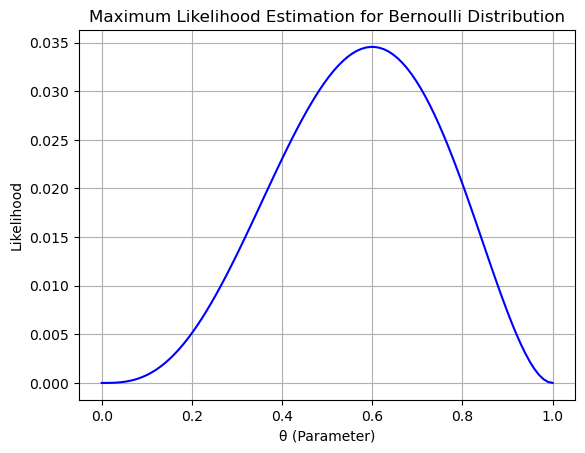

In [7]:
def bernoulli_likelihood(theta, data):
    likelihood = 1.0
    for x in data:
        likelihood *= theta**x * (1 - theta)**(1 - x)
    return likelihood

# Observed data (example)
observed_data = [1, 0, 1, 1, 0]

# Range of theta values to consider
theta_values = np.linspace(0, 1, 100)

# Calculate likelihood values for each theta
likelihood_values = [bernoulli_likelihood(theta, observed_data) for theta in theta_values]

# Plot the likelihood function
plt.plot(theta_values, likelihood_values, color='blue')
plt.xlabel('θ (Parameter)')
plt.ylabel('Likelihood')
plt.title('Maximum Likelihood Estimation for Bernoulli Distribution')
plt.grid(True)
plt.show()

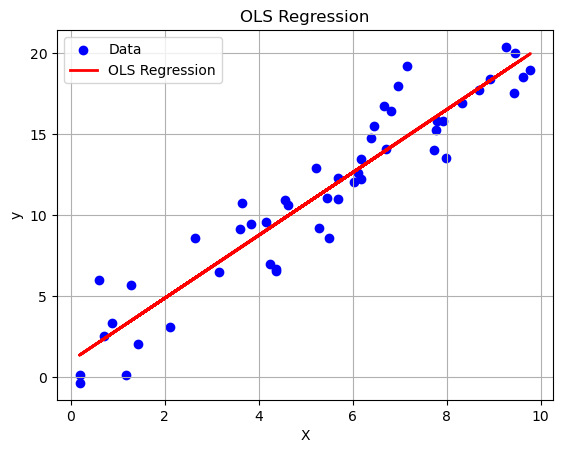

In [17]:
from sklearn.linear_model import LinearRegression

# Generate example data
np.random.seed(0)
X = np.random.rand(50, 1) * 10
y = 2 * X + 1 + np.random.randn(50, 1) * 2

# Create a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predictions from the model
y_pred = model.predict(X)

# Plot the data points and the regression line
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='OLS Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.title('OLS Regression')
plt.legend()
plt.grid(True)
plt.show()

 # $\beta$ of OLS = $\beta$ of MLE

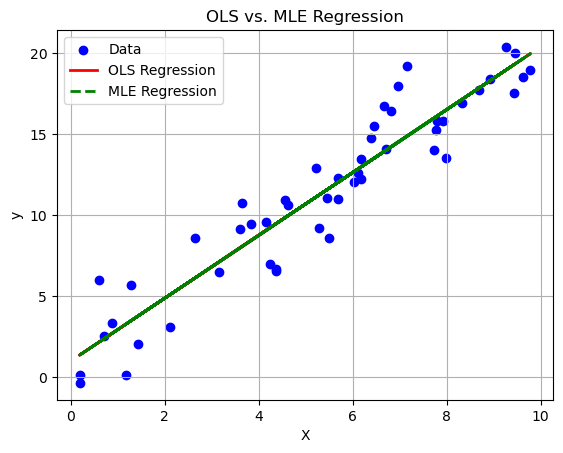

OLS Coefficients:
Intercept (beta_0): 0.9855798317394413
Slope (beta_1): 1.9385465894619054
MLE Coefficients:
Intercept (beta_0): 0.9855798317394449
Slope (beta_1): 1.9385465894619045


In [16]:
# Generate example data
np.random.seed(0)
X = np.random.rand(50, 1) * 10
y = 2 * X + 1 + np.random.randn(50, 1) * 2

# Perform Ordinary Least Squares (OLS) regression
ols_model = LinearRegression()
ols_model.fit(X, y)
ols_beta_0 = ols_model.intercept_[0]
ols_beta_1 = ols_model.coef_[0][0]

# Calculate MLE estimates analytically for comparison
X_mean = np.mean(X)
y_mean = np.mean(y)
beta_1_mle = np.sum((X - X_mean) * (y - y_mean)) / np.sum((X - X_mean)**2)
beta_0_mle = y_mean - beta_1_mle * X_mean

# Plot the data points and both regression lines
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, ols_beta_0 + ols_beta_1 * X, color='red', linewidth=2, label='OLS Regression')
plt.plot(X, beta_0_mle + beta_1_mle * X, color='green', linestyle='dashed', linewidth=2, label='MLE Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.title('OLS vs. MLE Regression')
plt.legend()
plt.grid(True)
plt.show()

print("OLS Coefficients:")
print(f"Intercept (beta_0): {ols_beta_0}")
print(f"Slope (beta_1): {ols_beta_1}")

print("MLE Coefficients:")
print(f"Intercept (beta_0): {beta_0_mle}")
print(f"Slope (beta_1): {beta_1_mle}")

# Bias-Variance Decomposition
Bias-Variance Decomposition is a fundamental concept in the field of machine learning and statistical modeling. It helps us understand the sources of error in prediction models and guides us in building models that generalize well to unseen data.

In the context of supervised learning, such as regression and classification, the prediction error of a model can be decomposed into two main components: bias and variance.

1. **Bias:** Bias refers to the error introduced by approximating a real-world problem, which may be complex, by a simplified model. High bias can cause the model to miss relevant relations between features and the target variable. This often results in underfitting, where the model is too simple to capture the underlying patterns in the data. Models with high bias have systematic errors that consistently skew predictions away from the correct values.

2. **Variance:** Variance, on the other hand, measures the model's sensitivity to small fluctuations in the training data. High variance can cause the model to model the random noise in the training data rather than the underlying patterns. This leads to overfitting, where the model fits the training data too closely and doesn't generalize well to new, unseen data. Models with high variance exhibit large fluctuations in predictions when trained on different datasets.

The trade-off between bias and variance is known as the "bias-variance trade-off." Achieving a balance between the two is crucial for building models that perform well on both the training data and new data.

Mathematically, the mean squared error (MSE) of a model's predictions can be decomposed as follows:

$$
\text{MSE} = \text{Bias}^2 + \text{Variance} + \text{Irreducible Error}
$$

Here's a brief overview of the terms in the decomposition:

- Bias^2: The squared difference between the expected (average) prediction of the model and the true values.
- Variance: The variability of the model's predictions for different training datasets.
- Irreducible Error: The inherent noise in the data that can't be reduced by any model.

To visualize bias-variance trade-off and understand the concept better, you can think of the following scenarios:
- High Bias, Low Variance: The model is too simplistic and consistently wrong, but the predictions don't vary much between different datasets.
- High Variance, Low Bias: The model fits the training data closely but has trouble generalizing to new data.
- Balanced Bias and Variance: The model achieves a good trade-off, leading to better generalization.

The goal in machine learning is to find the right level of model complexity that minimizes both bias and variance, resulting in good predictive performance on new data. Techniques like regularization, cross-validation, and ensemble methods are often used to help manage the bias-variance trade-off.

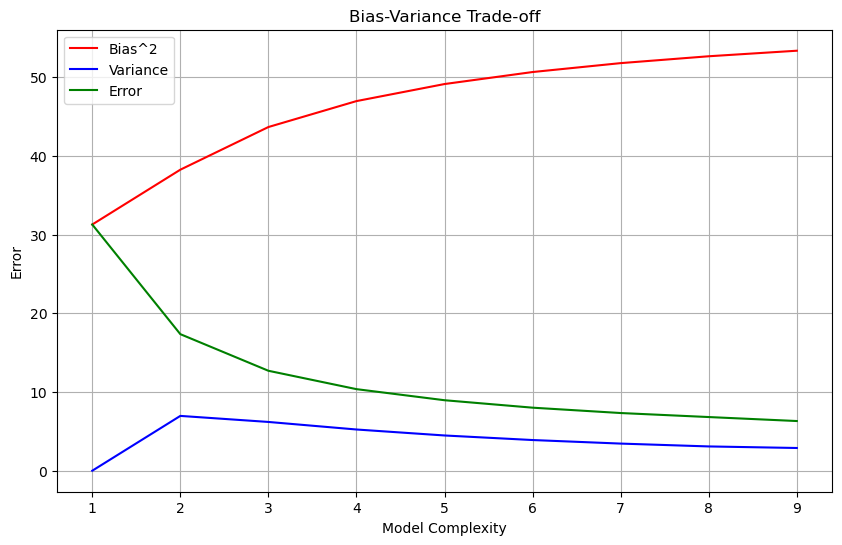

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Generate example data
np.random.seed(0)
X = np.random.rand(50, 1) * 10
y = 2 * X + 1 + np.random.randn(50, 1) * 2

# Define functions to calculate squared bias, variance, and error
def squared_bias(true_values, predicted_values):
    return np.mean((true_values - np.mean(predicted_values, axis=1))**2)

def variance(predicted_values):
    return np.mean(np.var(predicted_values, axis=1))

def mse(true_values, predicted_values):
    return np.mean((true_values - predicted_values)**2)

# Vary model complexity
complexity_values = np.arange(1, 10)
bias_squared_values = []
variance_values = []
error_values = []

for complexity in complexity_values:
    predicted_values = np.zeros((X.shape[0], complexity))
    
    for i in range(complexity):
        model = np.polyfit(X.flatten(), y.flatten(), deg=i)
        predicted_values[:, i] = np.polyval(model, X.flatten())
    
    bias_squared = squared_bias(y, predicted_values)
    bias_squared_values.append(bias_squared)
    
    var = variance(predicted_values)
    variance_values.append(var)
    
    err = mse(y, predicted_values)
    error_values.append(err)

# Plot the components
plt.figure(figsize=(10, 6))
plt.plot(complexity_values, bias_squared_values, label='Bias^2', color='red')
plt.plot(complexity_values, variance_values, label='Variance', color='blue')
plt.plot(complexity_values, error_values, label='Error', color='green')
plt.xlabel('Model Complexity')
plt.ylabel('Error')
plt.title('Bias-Variance Trade-off')
plt.legend()
plt.grid(True)
plt.show()


# Regularization 

In [23]:
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate example data
np.random.seed(0)
X = np.random.rand(100, 5) * 10
y = 2 * X[:, 0] + 3 * X[:, 1] + 5 * X[:, 2] + np.random.randn(100) * 2

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create linear regression models with L1 and L2 regularization
linear_reg = LinearRegression()
lasso_reg = Lasso(alpha=0.1)  # L1 regularization
ridge_reg = Ridge(alpha=1.0)  # L2 regularization

# Fit models to training data
linear_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_reg.predict(X_test)
y_pred_lasso = lasso_reg.predict(X_test)
y_pred_ridge = ridge_reg.predict(X_test)

# Calculate Mean Squared Error
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print("Mean Squared Error (Linear Regression):", mse_linear)
print("Mean Squared Error (Lasso Regression):", mse_lasso)
print("Mean Squared Error (Ridge Regression):", mse_ridge)


Mean Squared Error (Linear Regression): 4.642645120750909
Mean Squared Error (Lasso Regression): 4.486195346877931
Mean Squared Error (Ridge Regression): 4.575605975985568


In [20]:
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
#sharper plots
%config InlineBackend.figure_format = 'retina'


from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import (GridSearchCV, StratifiedKFold,
                                     cross_val_score)
from sklearn.preprocessing import PolynomialFeatures

dataset on microchip testing

In [21]:
# for Jupyter-book, we copy data from GitHub, locally, to save Internet traffic,
# you can specify the data/ folder from the root of your cloned
# https://github.com/Yorko/mlcourse.ai repo, to save Internet traffic
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"

# loading data
data = pd.read_csv(
    DATA_PATH + "microchip_tests.txt",
    header=None,
    names=("test1", "test2", "released")
)
# getting some info about dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   test1     118 non-null    float64
 1   test2     118 non-null    float64
 2   released  118 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.9 KB


In [22]:
data.head(5)

,test1,test2,released
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [46]:
X = data.iloc[:, :2].values
y = data.iloc[:, 2].values

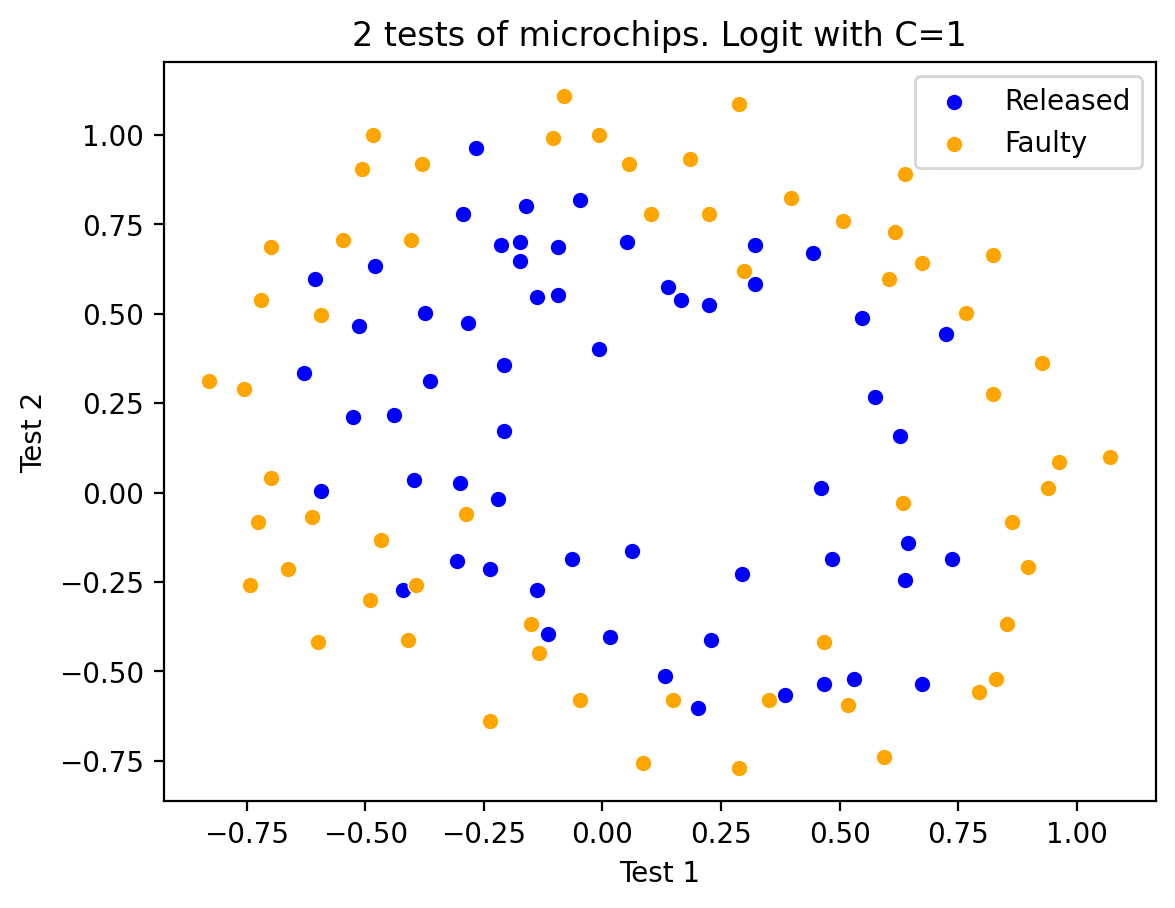

In [29]:
sns.scatterplot(x=X[y == 1, 0], y=X[y == 1, 1], color="blue", label="Released")
sns.scatterplot(x=X[y == 0, 0], y=X[y == 0, 1], color="orange", label="Faulty")
plt.xlabel("Test 1")
plt.ylabel("Test 2")
plt.title("2 tests of microchips. Logit with C=1")
plt.legend();

In [35]:
Xz = data.drop(columns='released').copy()
yz = data['released'].copy()

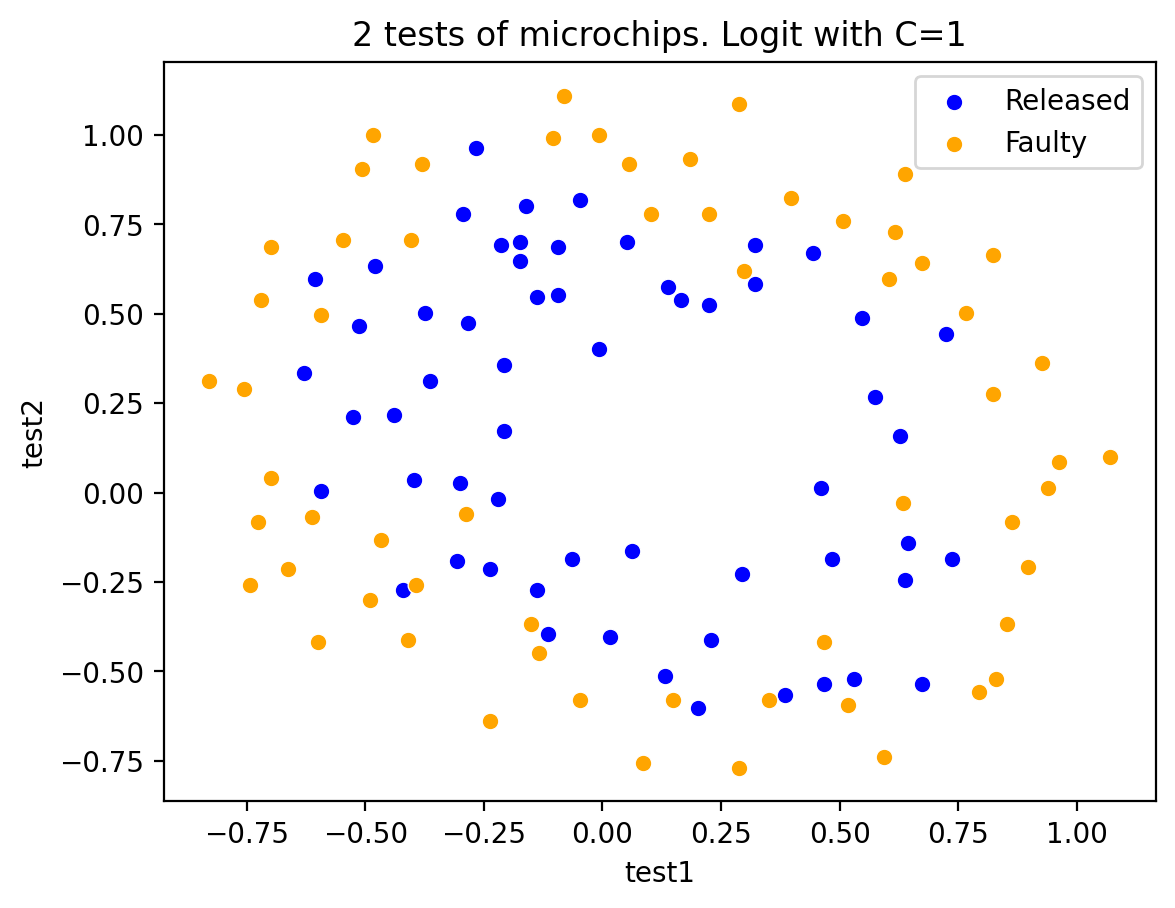

In [37]:
sns.scatterplot(x=X[y == 1]['test1'], y=X[y == 1]['test2'], color="blue", label="Released")
sns.scatterplot(x=X[y == 0]['test1'], y=X[y == 0]['test2'], color="orange", label="Faulty")
plt.title("2 tests of microchips. Logit with C=1")
plt.legend();

# Some Numpys

`np.arange` is a function from the NumPy library in Python that is used to create an array of values within a specified range. It returns an evenly spaced sequence of numbers based on the arguments provided.

`np.arange([start], stop, [step])`




In [40]:
import numpy as np

# Create an array of values from 0 to 9
arr1 = np.arange(10)
print(arr1)  # Output: [0 1 2 3 4 5 6 7 8 9]

# Create an array of values from 2 to 10 with a step of 2
arr2 = np.arange(2, 11, 2)
print(arr2)  # Output: [ 2  4  6  8 10]


[0 1 2 3 4 5 6 7 8 9]
[ 2  4  6  8 10]


`np.meshgrid` is a function from the NumPy library in Python that is used to create a grid of coordinates based on two or more coordinate vectors. It's particularly useful for creating input grids for functions that operate on multiple dimensions, such as plotting functions or functions that require input over a 2D grid.

`X, Y = np.meshgrid(x, y)`

In [41]:
import numpy as np

# Create coordinate vectors
x = np.array([1, 2, 3])
y = np.array([10, 20, 30])

# Create a grid of coordinates using np.meshgrid
X, Y = np.meshgrid(x, y)

print("X:")
print(X)
# Output:
# [[1 2 3]
#  [1 2 3]
#  [1 2 3]]

print("Y:")
print(Y)
# Output:
# [[10 10 10]
#  [20 20 20]
#  [30 30 30]]


X:
[[1 2 3]
 [1 2 3]
 [1 2 3]]
Y:
[[10 10 10]
 [20 20 20]
 [30 30 30]]


The `.ravel()` function is a method in NumPy that is used to flatten a multi-dimensional array into a one-dimensional array. It returns a new array that contains all the elements of the original array in a single row.

In [39]:
import numpy as np

# Create a 2D array
arr_2d = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

# Flatten the 2D array using .ravel()
arr_1d = arr_2d.ravel()

print("Original 2D array:")
print(arr_2d)
# Output:
# [[1 2 3]
#  [4 5 6]
#  [7 8 9]]

print("Flattened 1D array:")
print(arr_1d)
# Output:
# [1 2 3 4 5 6 7 8 9]


Original 2D array:
[[1 2 3]
 [4 5 6]
 [7 8 9]]
Flattened 1D array:
[1 2 3 4 5 6 7 8 9]


Let’s define a function to display the separating curve of the classifier.



In [47]:
def plot_boundary(clf, X, y, grid_step=0.01, poly_featurizer=None):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, grid_step), np.arange(y_min, y_max, grid_step)
    )

    # to every point from [x_min, m_max]x[y_min, y_max]
    # we put in correspondence its own color
    Z = clf.predict(poly_featurizer.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)

In [49]:
poly = PolynomialFeatures(degree=7)
X_poly = poly.fit_transform(X)
X_poly.shape

(118, 36)

Accuracy on training set: 0.627


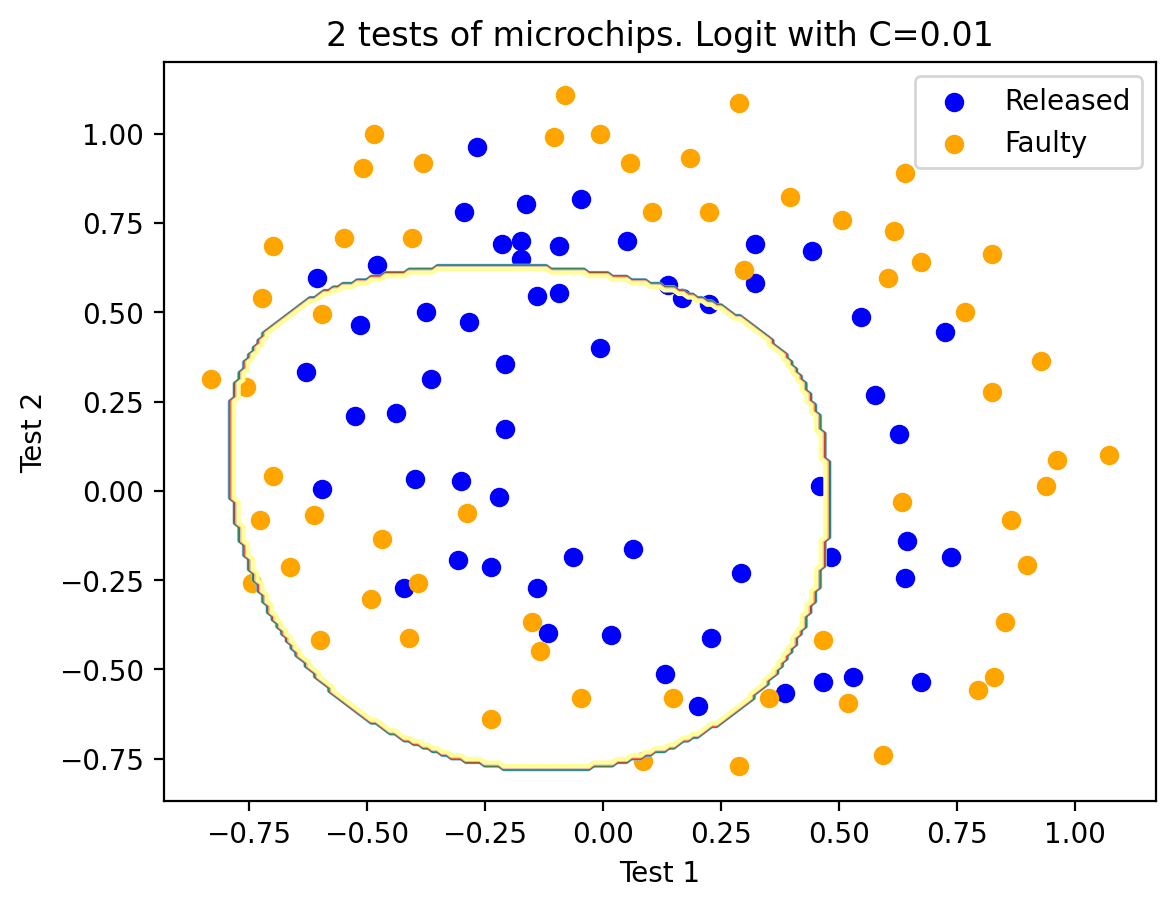

In [50]:
C = 1e-2
logit = LogisticRegression(C=C, random_state=17)
logit.fit(X_poly, y)

plot_boundary(logit, X, y, grid_step=0.01, poly_featurizer=poly)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c="blue", label="Released")
plt.scatter(X[y == 0, 0], X[y == 0, 1], c="orange", label="Faulty")
plt.xlabel("Test 1")
plt.ylabel("Test 2")
plt.title("2 tests of microchips. Logit with C=%s" % C)
plt.legend()

print("Accuracy on training set:", round(logit.score(X_poly, y), 3))

Accuracy on training set: 0.831


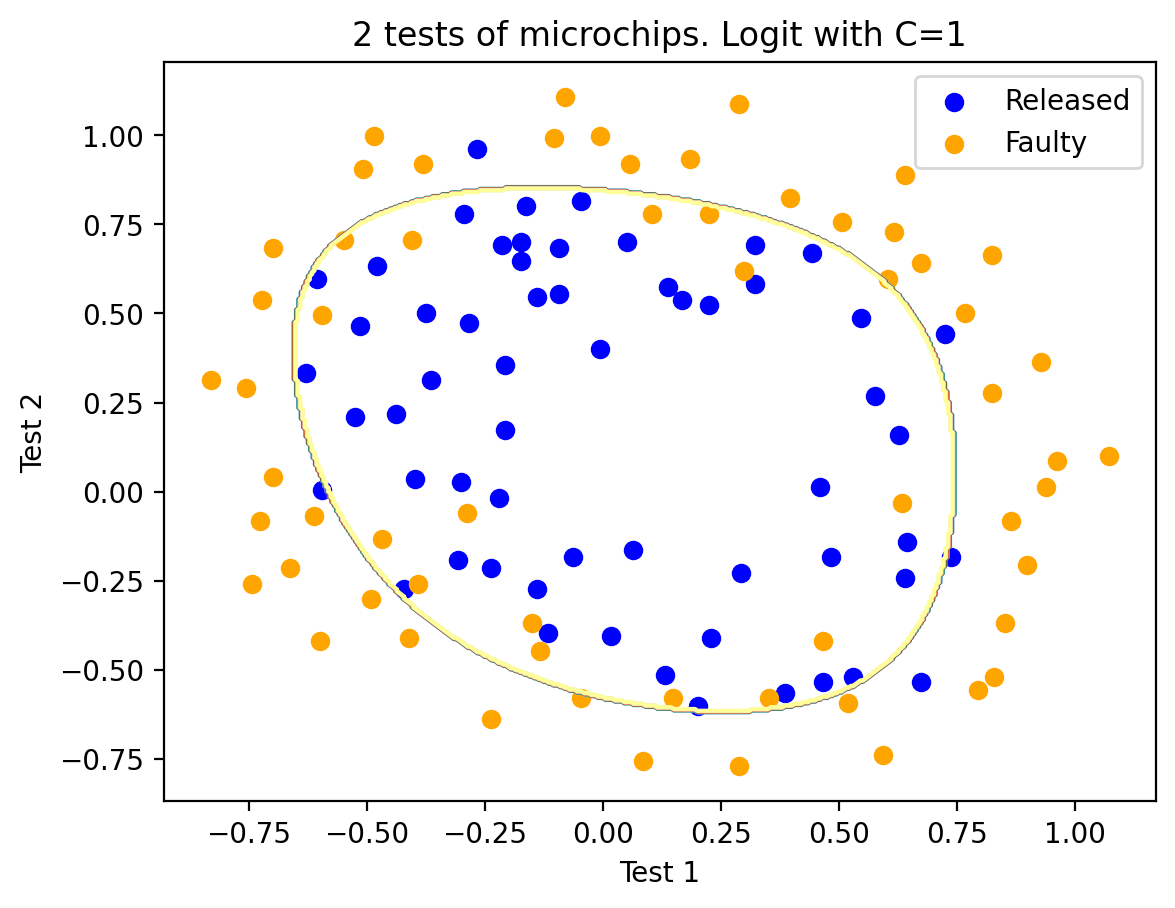

In [51]:
C = 1
logit = LogisticRegression(C=C, random_state=17)
logit.fit(X_poly, y)

plot_boundary(logit, X, y, grid_step=0.005, poly_featurizer=poly)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c="blue", label="Released")
plt.scatter(X[y == 0, 0], X[y == 0, 1], c="orange", label="Faulty")
plt.xlabel("Test 1")
plt.ylabel("Test 2")
plt.title("2 tests of microchips. Logit with C=%s" % C)
plt.legend()

print("Accuracy on training set:", round(logit.score(X_poly, y), 3))

Accuracy on training set: 0.873


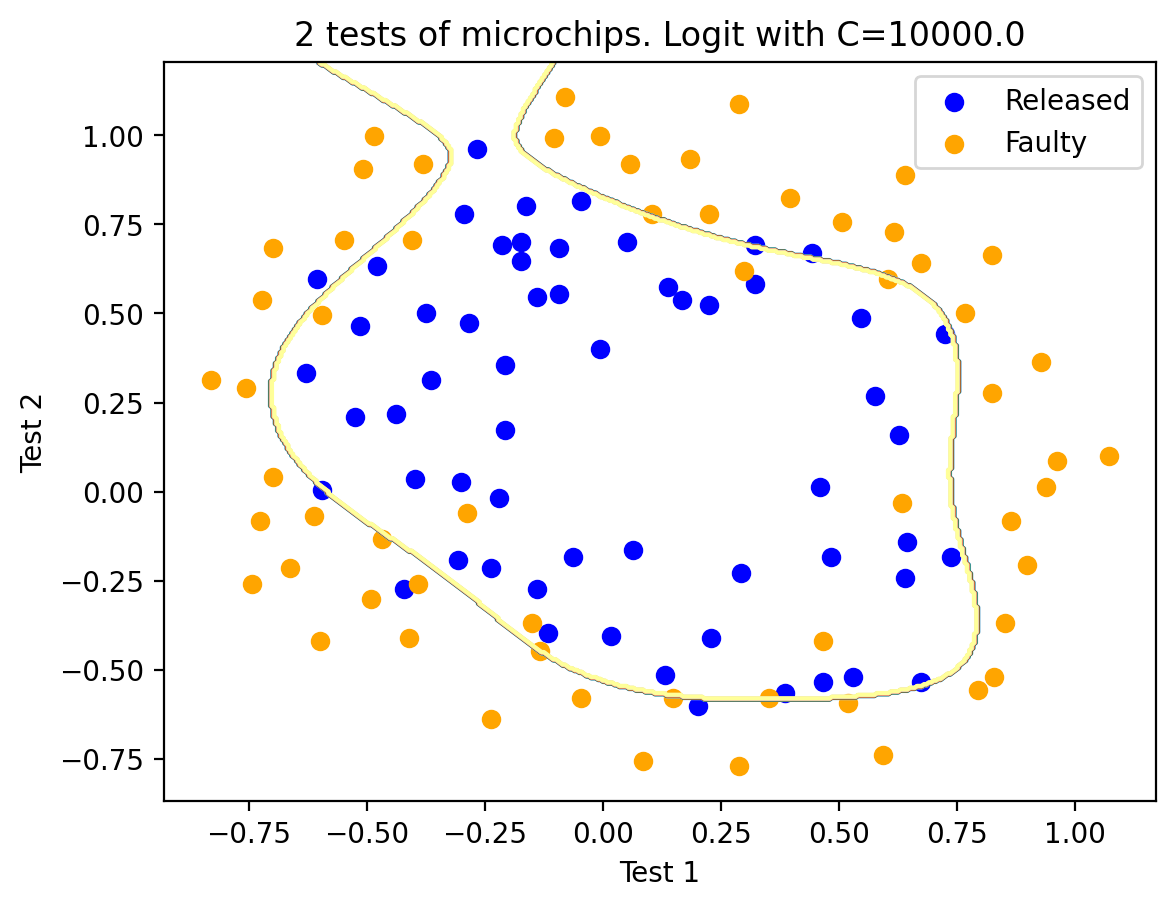

In [52]:
C = 1e4
logit = LogisticRegression(C=C, random_state=17)
logit.fit(X_poly, y)

plot_boundary(logit, X, y, grid_step=0.005, poly_featurizer=poly)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c="blue", label="Released")
plt.scatter(X[y == 0, 0], X[y == 0, 1], c="orange", label="Faulty")
plt.xlabel("Test 1")
plt.ylabel("Test 2")
plt.title("2 tests of microchips. Logit with C=%s" % C)
plt.legend()

print("Accuracy on training set:", round(logit.score(X_poly, y), 3))

# Using `LogisticRegressionCV`

Other models can use `GridSearchCV, RandomizedSearchCV`

In [53]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

c_values = np.logspace(-2, 3, 500)

logit_searcher = LogisticRegressionCV(Cs=c_values, cv=skf, n_jobs=-1)
logit_searcher.fit(X_poly, y);

In [54]:
logit_searcher.C_

array([150.78450459])

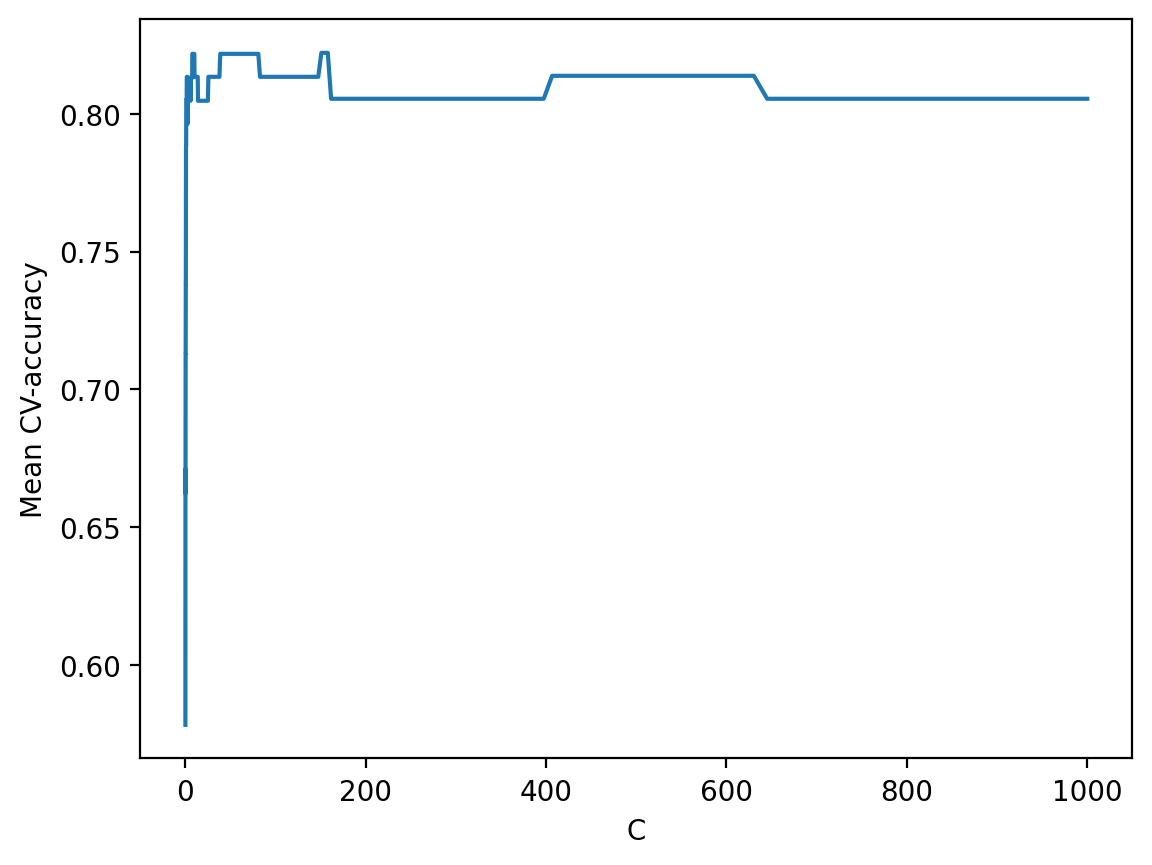

In [59]:
sns.lineplot(x=c_values, y=np.mean(logit_searcher.scores_[1], axis=0))
plt.xlabel("C")
plt.ylabel("Mean CV-accuracy");

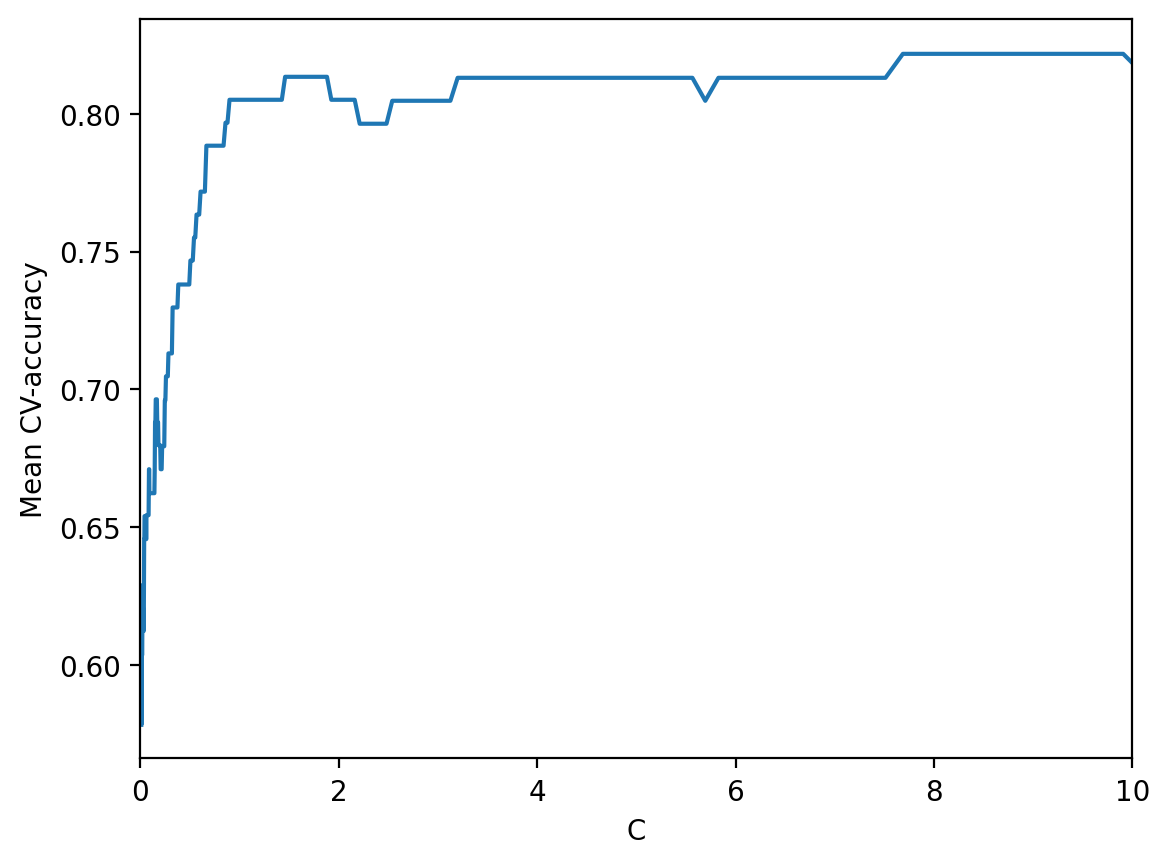

In [60]:
plt.plot(c_values, np.mean(logit_searcher.scores_[1], axis=0))
plt.xlabel("C")
plt.ylabel("Mean CV-accuracy")
plt.xlim((0, 10));

IMDB

In [64]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#sharper plots
%config InlineBackend.figure_format = 'retina'
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

In [76]:
file_path = 'D:/1 DA Courses/mlcourse.ai/4 Linear Classification and Regression/data/'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path+'IMDB Dataset.csv')

# Display the first few rows of the DataFrame
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [77]:
df.shape

(50000, 2)

In [107]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets
text_train, text_test, y_train, y_test = train_test_split(
    df.review, df.sentiment, test_size=0.5, random_state=42
)

print(text_train.shape, y_train.shape)
print(text_test.shape, y_test.shape)


(25000,) (25000,)
(25000,) (25000,)


In [108]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


First, we will create a dictionary of all the words using CountVectorizer

In [109]:
cv = CountVectorizer()
cv.fit(text_train)

len(cv.vocabulary_)

76632

In [110]:
print(cv.get_feature_names_out()[:50])
print()
print(cv.get_feature_names_out()[50000:50050])
print()
print(cv.get_feature_names_out()[76000:76050])


['00' '000' '00000000000' '00001' '000dm' '001' '003830' '007' '0079'
 '0080' '0083' '009' '0093638' '00am' '00o' '00pm' '00s' '00schneider'
 '01' '0126' '01pm' '02' '020410' '029' '03' '04' '05' '050' '05nomactr'
 '06' '0615' '07' '07b' '08' '087' '089' '08th' '09' '0and' '0f' '0r'
 '0tt' '10' '100' '1000' '10000' '1000000' '10000000000' '10000000000000'
 '1000lb']

['pausing' 'pav' 'pavarotti' 'pave' 'paved' 'pavel' 'pavelic' 'pavement'
 'pavements' 'paves' 'pavillions' 'paving' 'paviva' 'pavle' 'pavlosky'
 'pavlov' 'pavlovsky' 'pavor' 'paw' 'pawing' 'pawn' 'pawnbroker' 'pawning'
 'pawns' 'pawnshop' 'paws' 'pax' 'paxinou' 'paxson' 'paxton' 'paxtons'
 'pay' 'payal' 'payaso' 'payback' 'paycheck' 'paychecks' 'payday'
 'paydirt' 'payed' 'payer' 'payers' 'paying' 'payloads' 'payment'
 'payments' 'paymer' 'payne' 'payne2' 'paynes']

['yochobel' 'yoda' 'yodel' 'yodeler' 'yodeling' 'yodeller' 'yodelling'
 'yodels' 'yog' 'yoga' 'yoganda' 'yogi' 'yograj' 'yogurt' 'yohn' 'yoi'
 'yoing' 'yoji' '

Tokens (words) above are not good at all

In [111]:
X_train = cv.transform(text_train)
X_train

<25000x76632 sparse matrix of type '<class 'numpy.int64'>'
	with 3402769 stored elements in Compressed Sparse Row format>

Let’s see how our transformation worked



In [112]:
text_train[19726]

"I have read both the book and saw the movie today. The storyline is so powerful that almost any script or screenplay would have done justice to it. So nothing much there. However, this is still a beautiful movie because it makes one think and feel, just like the book. Watching it is not like watching a documentary on a failed state and feeling sympathetic towards people suffering under an oppressive regime, but is like watching any other common man's story unfold, across generations, across continents. Amir's cowardice, his guilt, his dilemmas and finally his choosing a way of redemption could have been a story of any of us. There isn't a single infallible character to look up to and idolize but all of them are gray, just like all of us.<br /><br />Another important observation is that the movie does a great job of chronicling the lives of Afghans through the twenty some years of turbulent political scenarios. The vibrant, care-free childhood represents Kabul before the Russian invasi

X_train: This is assumed to be a sparse matrix (e.g., a document-term matrix or a feature matrix) where each row represents a data sample (e.g., a document) and each column represents a feature (e.g., a word or a numeric feature).

X_train[19726]: This syntax is used to access the 19726th row of the sparse matrix X_train.

.nonzero(): This method is applied to the specific row obtained in step 2. It returns a tuple of arrays, where the first array contains the row indices of non-zero elements and the second array contains the column indices of non-zero elements.

[1]: This is used to access the second array in the tuple returned by .nonzero(), which contains the column indices of non-zero elements.

In [113]:
X_train[19726].nonzero()[1]

array([ 1515,  2826,  2915,  3287,  3755,  4798,  6473,  7206,  8177,
       13978, 14717, 15475, 18225, 18297, 22485, 23260, 26058, 31415,
       35404, 35505, 40452, 40540, 40586, 41160, 45251, 46355, 46553,
       47806, 48291, 50428, 57486, 58405, 60809, 63099, 67917, 67935,
       68028, 68115, 68207, 68729, 71184, 71486, 73423, 73770, 75342,
       75426, 75444, 76373])

In [114]:
X_train[19726].nonzero()


(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0]),
 array([ 1515,  2826,  2915,  3287,  3755,  4798,  6473,  7206,  8177,
        13978, 14717, 15475, 18225, 18297, 22485, 23260, 26058, 31415,
        35404, 35505, 40452, 40540, 40586, 41160, 45251, 46355, 46553,
        47806, 48291, 50428, 57486, 58405, 60809, 63099, 67917, 67935,
        68028, 68115, 68207, 68729, 71184, 71486, 73423, 73770, 75342,
        75426, 75444, 76373]))

In [115]:
X_test = cv.transform(text_test)


In [116]:
%%time
logit = LogisticRegression(solver="lbfgs", n_jobs=-1, random_state=7)
logit.fit(X_train, y_train)

CPU times: total: 93.8 ms
Wall time: 4.43 s


LogisticRegression(n_jobs=-1, random_state=7)

In [117]:
round(logit.score(X_train, y_train), 3), round(logit.score(X_test, y_test), 3),


(0.988, 0.886)

In [118]:
def visualize_coefficients(classifier, feature_names, n_top_features=25):
    # get coefficients with large absolute values
    coef = classifier.coef_.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients, positive_coefficients])
    # plot them
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(
        np.arange(1, 1 + 2 * n_top_features),
        feature_names[interesting_coefficients],
        rotation=60,
        ha="right",
    );

In [119]:
def plot_grid_scores(grid, param_name):
    plt.plot(
        grid.param_grid[param_name],
        grid.cv_results_["mean_train_score"],
        color="green",
        label="train",
    )
    plt.plot(
        grid.param_grid[param_name],
        grid.cv_results_["mean_test_score"],
        color="red",
        label="test",
    )
    plt.legend();

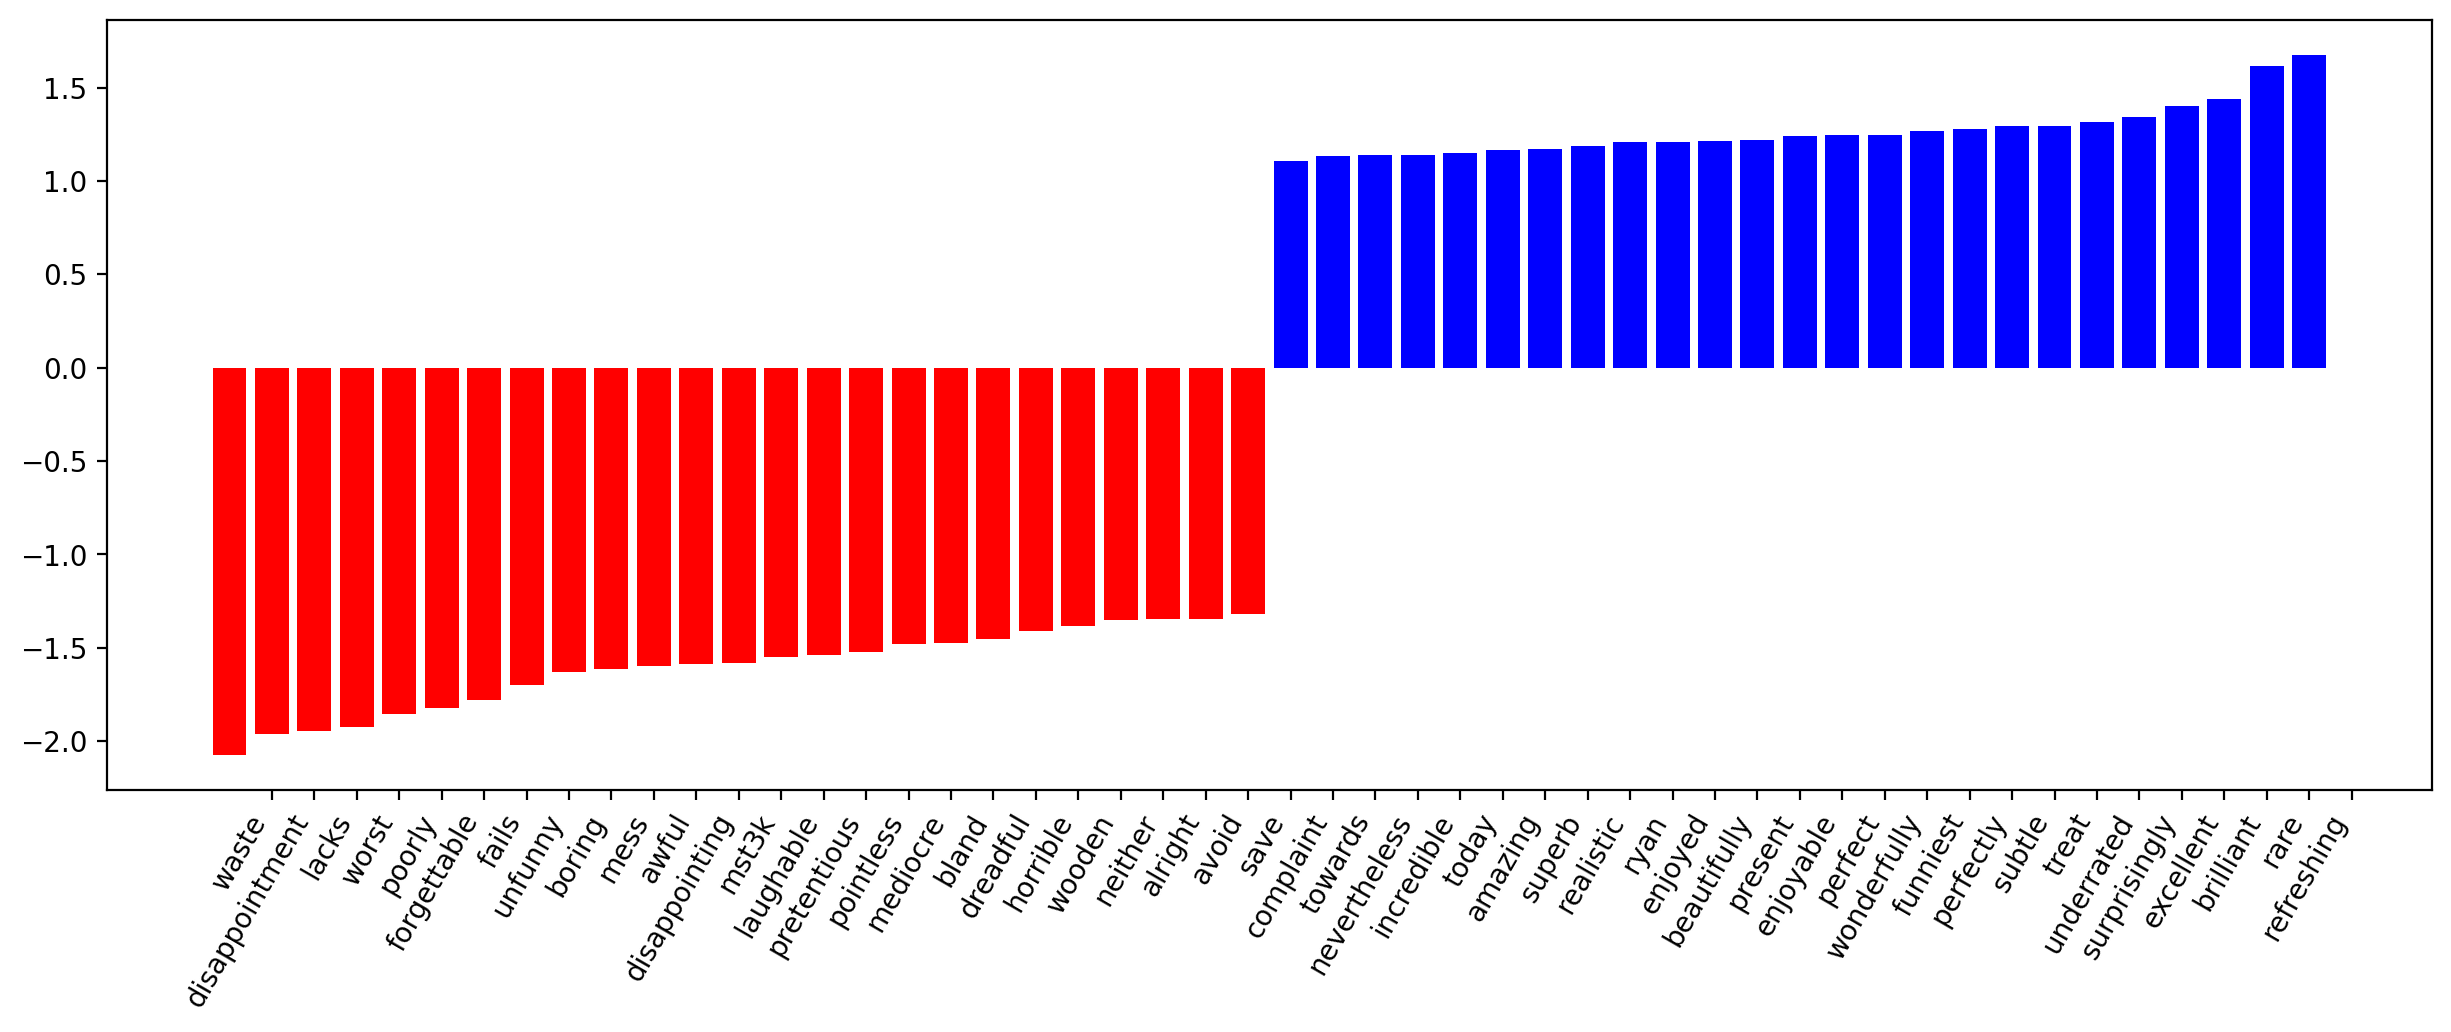

In [120]:
visualize_coefficients(logit, cv.get_feature_names_out());

In [121]:
%%time
from sklearn.pipeline import make_pipeline

text_pipe_logit = make_pipeline(
    CountVectorizer(),
    # for some reason n_jobs > 1 won't work
    # with GridSearchCV's n_jobs > 1
    LogisticRegression(solver="lbfgs", n_jobs=1, random_state=7),
)

text_pipe_logit.fit(text_train, y_train)
print(text_pipe_logit.score(text_test, y_test))

0.88428
CPU times: total: 43.5 s
Wall time: 16.9 s


In [122]:
%%time
from sklearn.model_selection import GridSearchCV

param_grid_logit = {"logisticregression__C": np.logspace(-5, 0, 6)}

grid_logit = GridSearchCV(estimator=text_pipe_logit, 
                          param_grid=param_grid_logit, 
                          return_train_score=True, 
                          cv=3, 
                          n_jobs=-1)

grid_logit.fit(text_train, y_train)

CPU times: total: 39.7 s
Wall time: 54.2 s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('countvectorizer', CountVectorizer()),
                                       ('logisticregression',
                                        LogisticRegression(n_jobs=1,
                                                           random_state=7))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00])},
             return_train_score=True)

In [123]:
grid_logit.best_params_, grid_logit.best_score_

({'logisticregression__C': 0.1}, 0.8807198364248464)

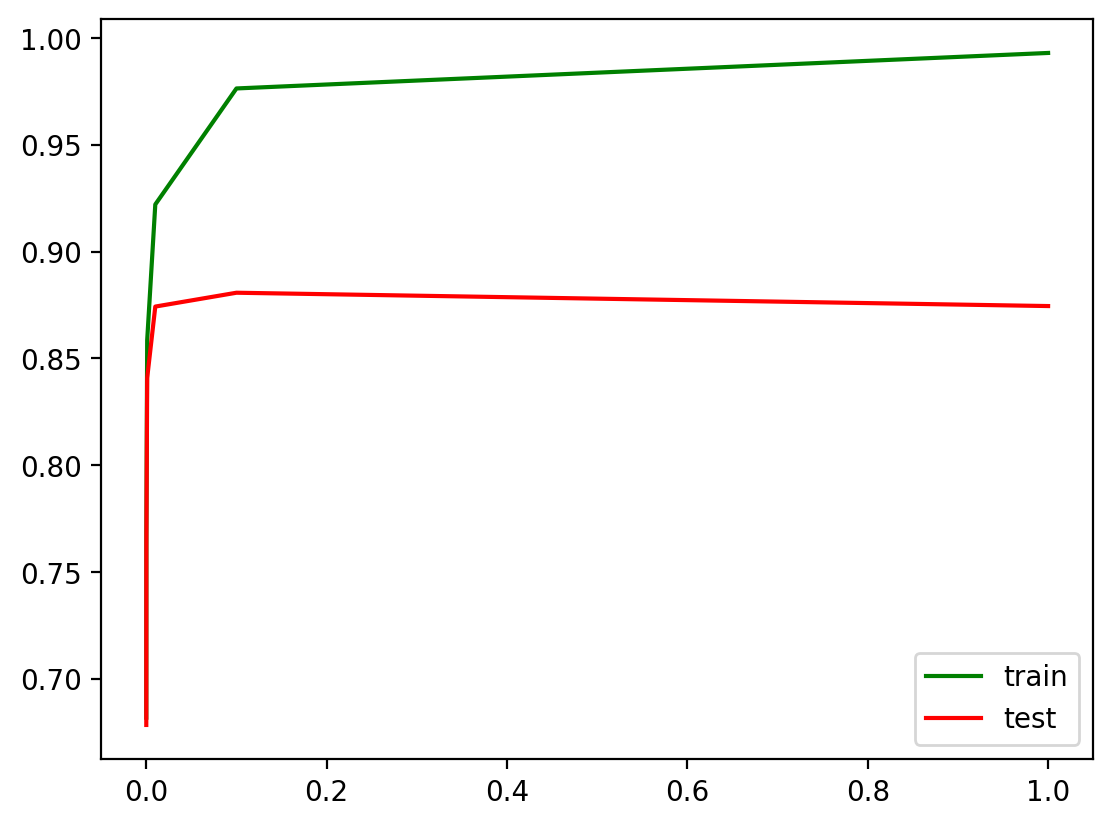

In [124]:
plot_grid_scores(grid_logit, "logisticregression__C")

In [125]:
grid_logit.score(text_test, y_test)

0.89348

In [127]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=17)

In [128]:
%%time
forest.fit(X_train, y_train)

CPU times: total: 16min 8s
Wall time: 1min 6s


RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=17)

In [129]:
round(forest.score(X_test, y_test), 3)


0.859

In [133]:
# Printing the score of the logistic regression model on the test set
print("Logistic Regression Test Score:", round(text_pipe_logit.score(text_test, y_test),3))

# Printing the best score obtained from the grid search with logistic regression
print("Best Score from Grid Search (Logistic Regression):", round(grid_logit.best_score_,3))

# Printing the score of the random forest model on the test set (rounded to 3 decimal places)
print("Random Forest Test Score:", round(forest.score(X_test, y_test), 3))


Logistic Regression Test Score: 0.884
Best Score from Grid Search (Logistic Regression): 0.881
Random Forest Test Score: 0.859


`numpy.random.randn:`

numpy.random.randn generates random numbers from a standard normal distribution (mean 0 and standard deviation 1). It returns an array of random samples with the specified shape.

`numpy.logical_xor:`

numpy.logical_xor performs element-wise logical XOR (exclusive OR) operation between two arrays. It returns an array of the same shape as the input arrays, where each element is the result of the XOR operation between the corresponding elements of the input arrays.

In [134]:
# creating dataset
rng = np.random.RandomState(0)
X = rng.randn(200, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

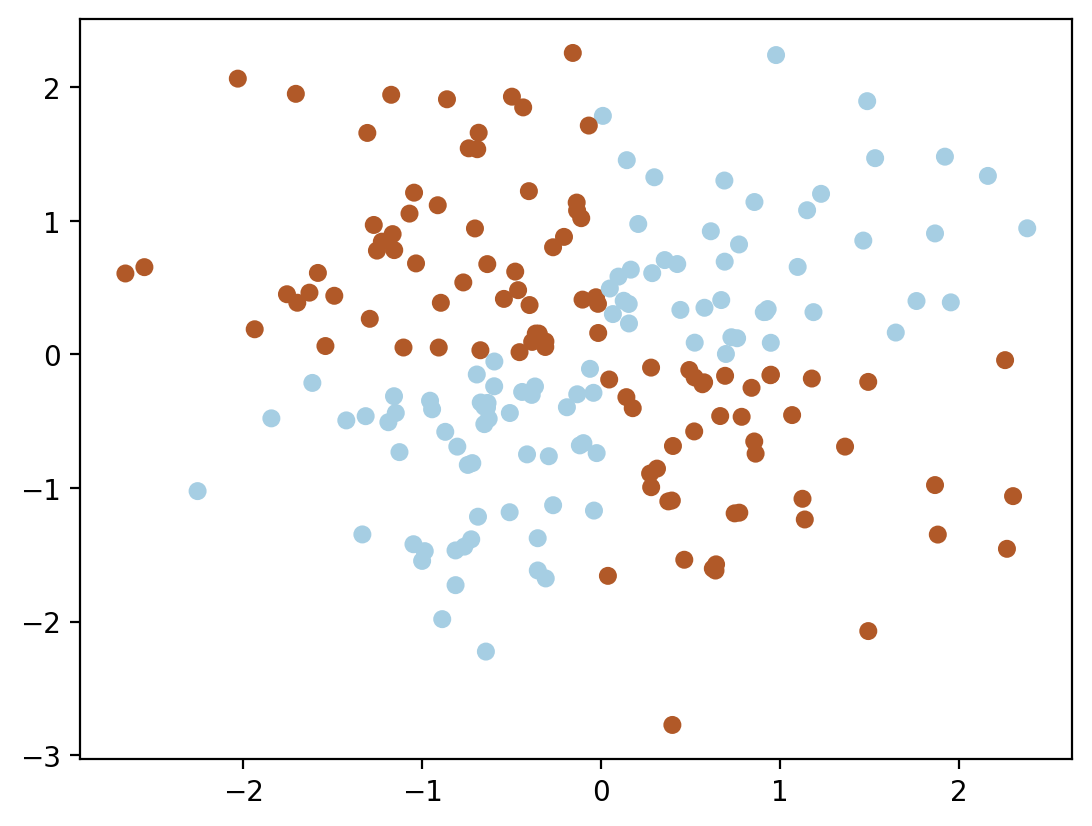

In [135]:
plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired);


In [136]:
def plot_boundary(clf, X, y, plot_title):
    xx, yy = np.meshgrid(np.linspace(-3, 3, 50), np.linspace(-3, 3, 50))
    clf.fit(X, y)
    # plot the decision function for each datapoint on the grid
    Z = clf.predict_proba(np.vstack((xx.ravel(), yy.ravel())).T)[:, 1]
    Z = Z.reshape(xx.shape)

    image = plt.imshow(
        Z,
        interpolation="nearest",
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        aspect="auto",
        origin="lower",
        cmap=plt.cm.PuOr_r,
    )
    contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linetypes="--")
    plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired)
    plt.xticks(())
    plt.yticks(())
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$")
    plt.axis([-3, 3, -3, 3])
    plt.colorbar(image)
    plt.title(plot_title, fontsize=12);

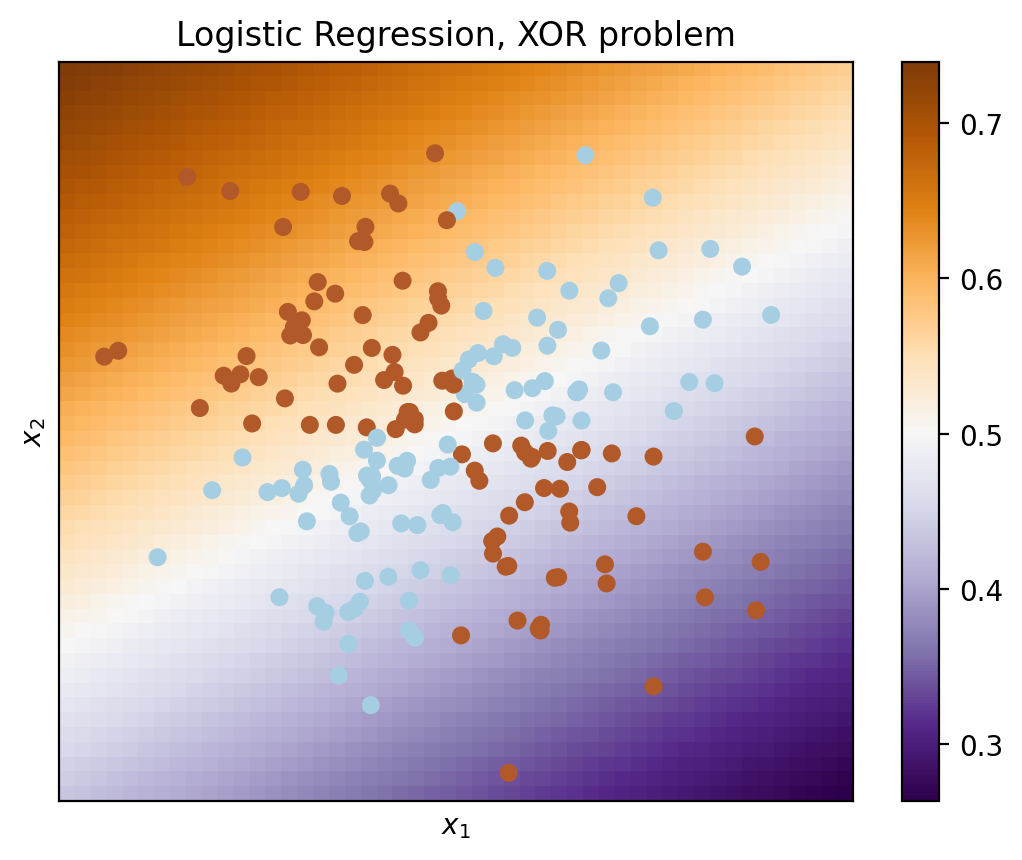

In [137]:
plot_boundary(
    LogisticRegression(solver="lbfgs"), X, y, "Logistic Regression, XOR problem"
)

In [16]:
import warnings
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
#sharper plots
%config InlineBackend.figure_format = 'retina'

from sklearn.linear_model import (LogisticRegression, LogisticRegressionCV,
                                  SGDClassifier)
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

warnings.filterwarnings("ignore")

The ability to make the right decision and choose the right method to improve the model distinguishes a good professional from a bad one.

In [17]:
# for Jupyter-book, we copy data from GitHub, locally, to save Internet traffic,
# you can specify the data/ folder from the root of your cloned
# https://github.com/Yorko/mlcourse.ai repo, to save Internet traffic
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"

data = pd.read_csv(DATA_PATH + "telecom_churn.csv").drop("State", axis=1)
data["International plan"] = data["International plan"].map({"Yes": 1, "No": 0})
data["Voice mail plan"] = data["Voice mail plan"].map({"Yes": 1, "No": 0})

y = data["Churn"].astype("int").values
X = data.drop("Churn", axis=1).values

In NumPy, the numpy.logspace function is used to create an array of numbers that are evenly spaced on a logarithmic scale. It is often used when you need values that span a wide range of magnitudes.

`numpy.logspace(start, stop, num=50, base=10.0, dtype=None, endpoint=True)
`

In [23]:
alphas = np.logspace(-2, 0, 20)

# logistic regression with stochastic gradient descent
sgd_logit = SGDClassifier(loss="log", n_jobs=-1, random_state=17, max_iter=5) 

logit_pipe = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("poly", PolynomialFeatures(degree=2)),
        ("sgd_logit", sgd_logit),
    ]
)
val_train, val_test = validation_curve(
    estimator=logit_pipe, 
    X=X, y=y, 
    param_name="sgd_logit__alpha", 
    param_range=alphas, 
    cv=5, 
    scoring="roc_auc"
)

kwargs is a common abbreviation in Python that stands for "keyword arguments." It refers to a special kind of argument in function calls that are specified using the syntax name=value.



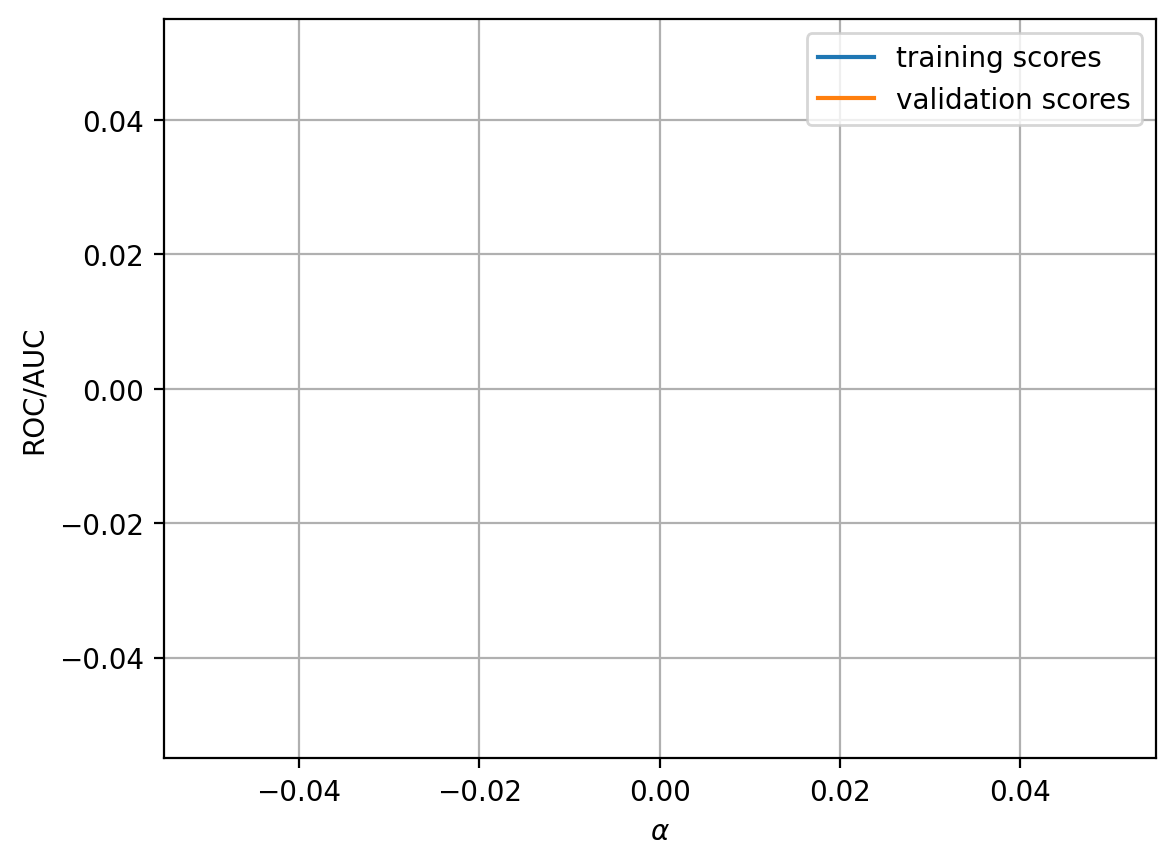

In [24]:
def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, "-", **kwargs)
    plt.fill_between(
        x,
        mu - std,
        mu + std,
        edgecolor="none",
        facecolor=lines[0].get_color(),
        alpha=0.2,
    )

plot_with_err(alphas, val_train, label="training scores")
plot_with_err(alphas, val_test, label="validation scores")
plt.xlabel(r"$\alpha$")
plt.ylabel("ROC/AUC")
plt.legend()
plt.grid(True)
plt.show()  # Display the plot


#  alpha = regularization coefficient 

In [25]:
def plot_learning_curve(degree=2, alpha=0.01):
    train_sizes = np.linspace(0.05, 1, 20)
    logit_pipe = Pipeline(
        [
            ("scaler", StandardScaler()),
            ("poly", PolynomialFeatures(degree=degree)),
            (
                "sgd_logit",
                SGDClassifier(n_jobs=-1, random_state=17, alpha=alpha, max_iter=5),
            ),
        ]
    )
    N_train, val_train, val_test = learning_curve(
        logit_pipe, X, y, train_sizes=train_sizes, cv=5, scoring="roc_auc"
    )
    plot_with_err(N_train, val_train, label="training scores")
    plot_with_err(N_train, val_test, label="validation scores")
    plt.xlabel("Training Set Size")
    plt.ylabel("AUC")
    plt.legend()
    plt.grid(True);

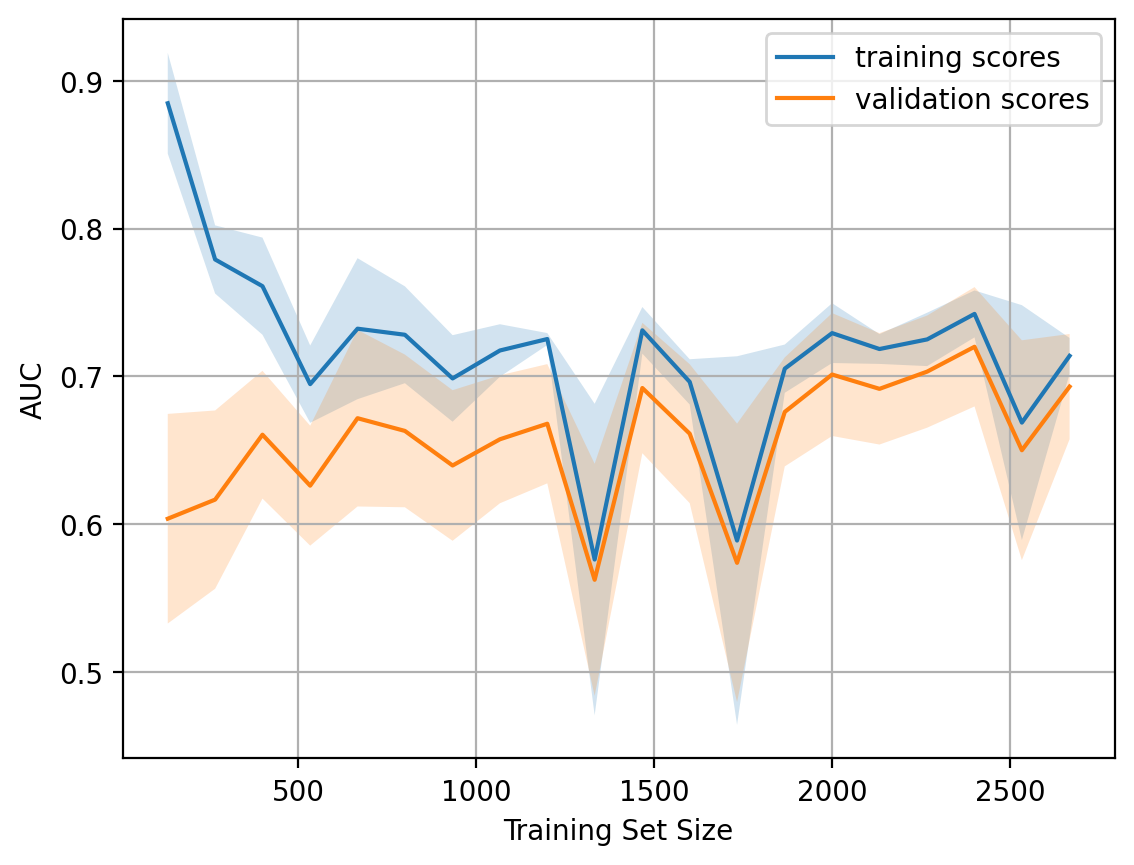

In [26]:
plot_learning_curve(degree=2, alpha=10)

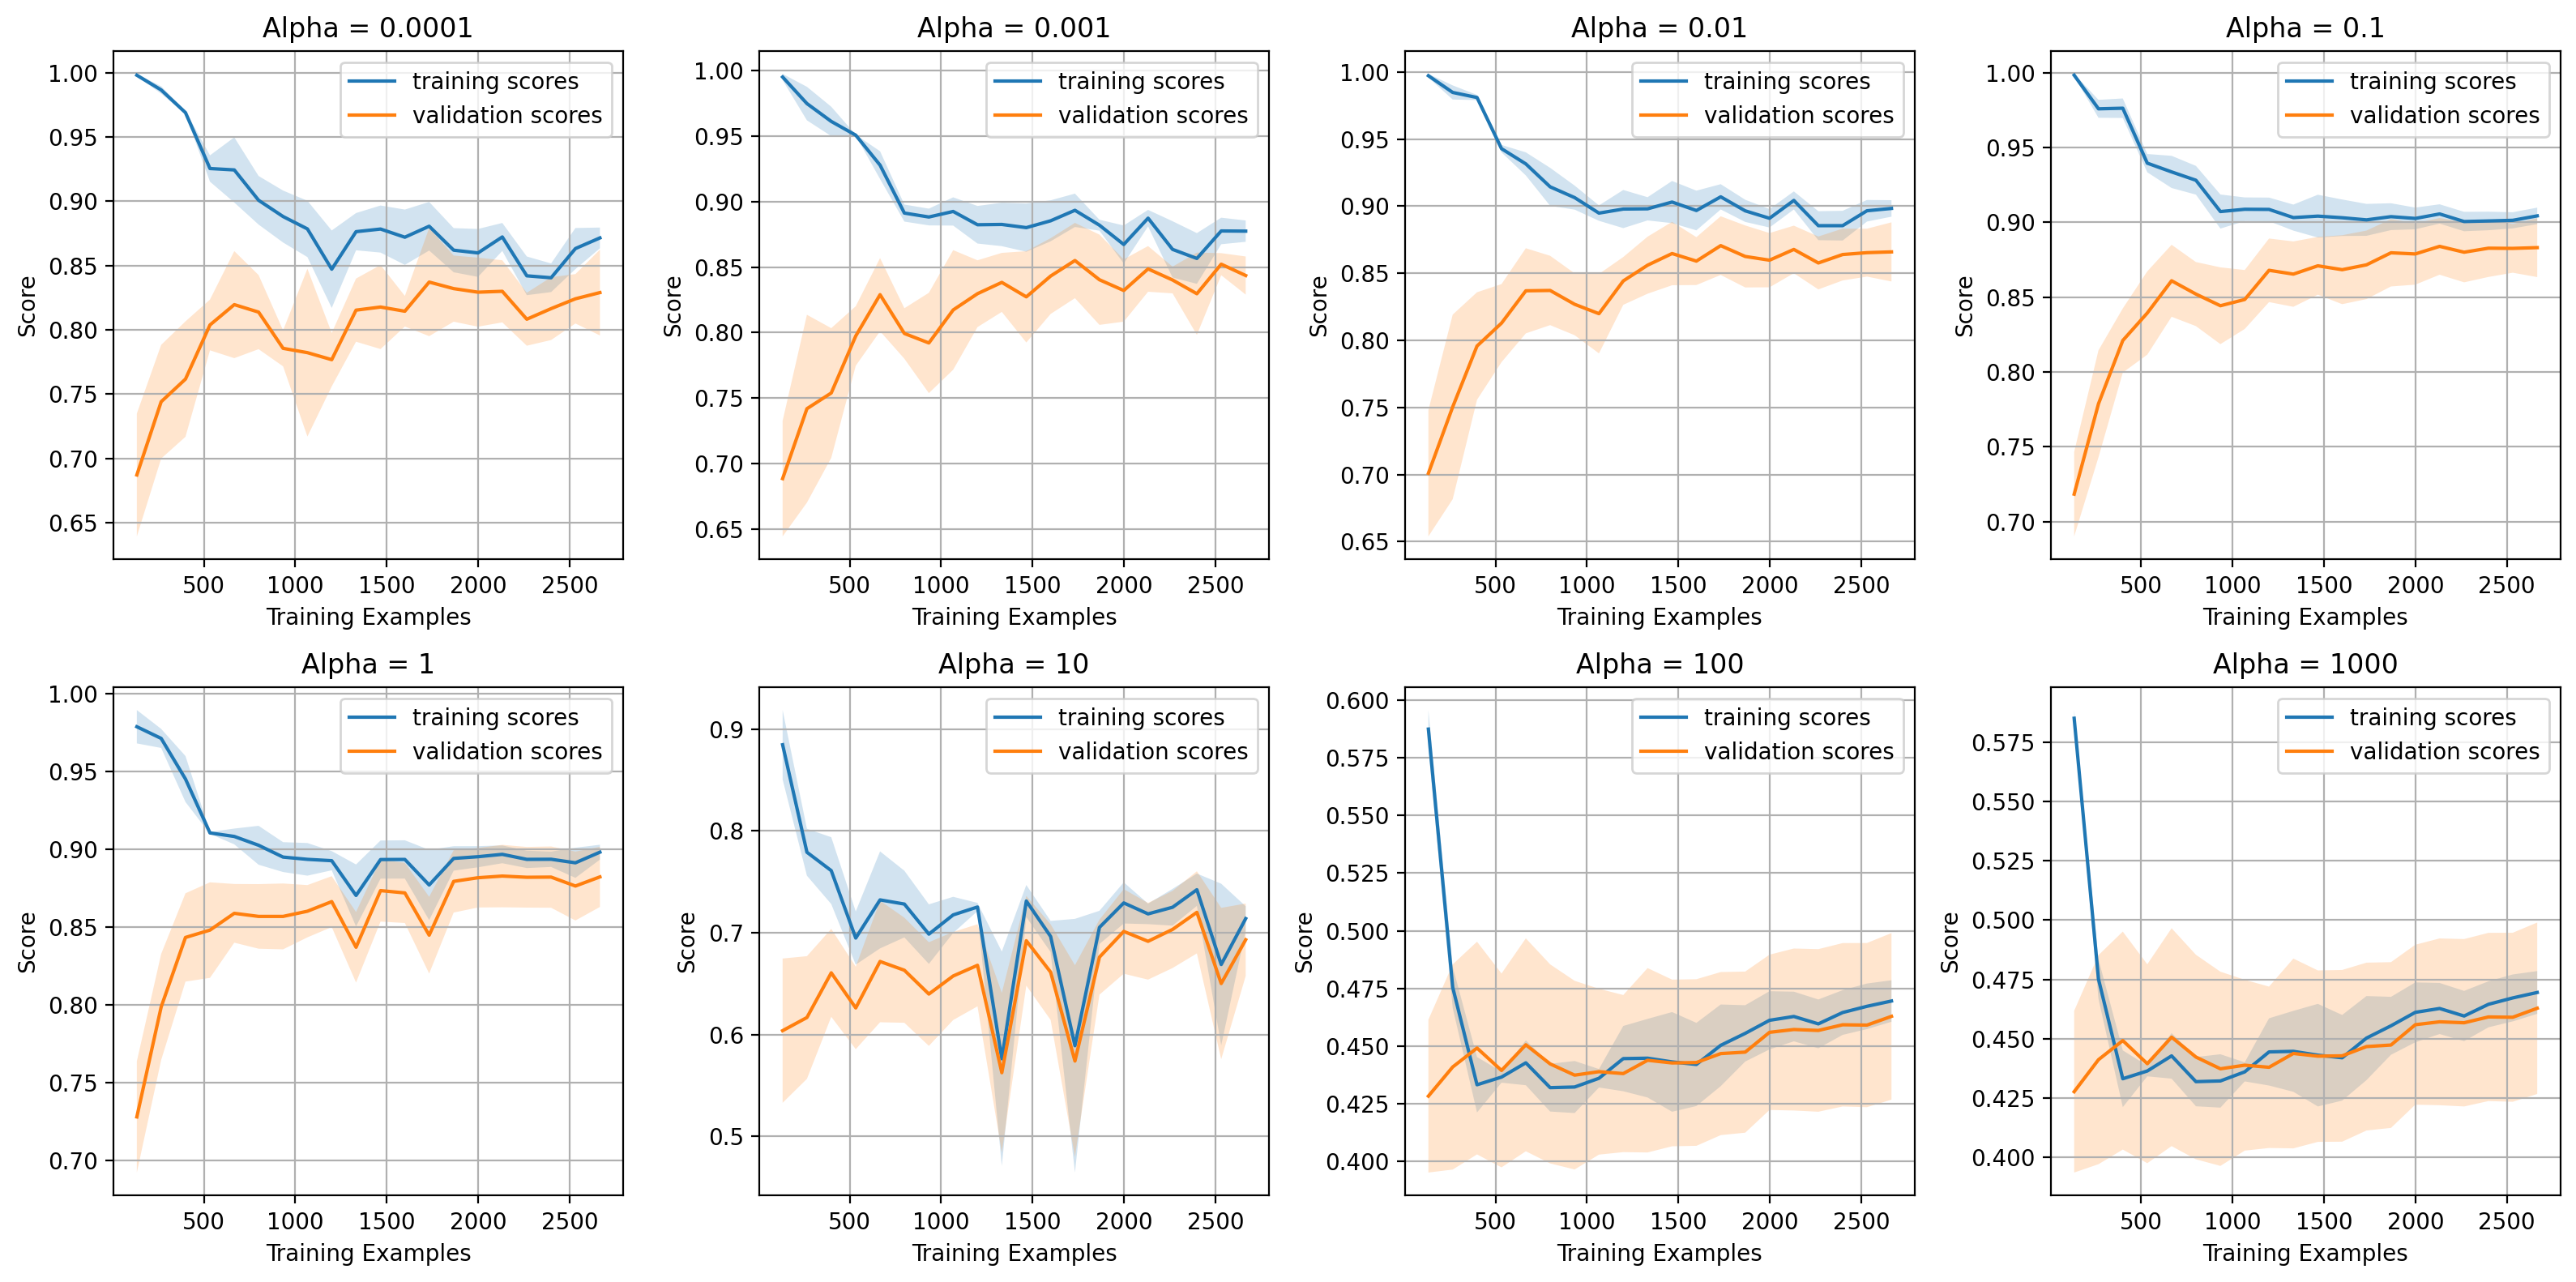

In [32]:
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
num_alphas = len(alphas)

# Create subplots
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

for i, alpha in enumerate(alphas):
    plt.sca(axes[i])  # Set the current subplot

    # Call the plot_learning_curve function with fixed degree and varying alpha
    plot_learning_curve(degree=2, alpha=alpha)

    plt.title(f"Alpha = {alpha}")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")

plt.tight_layout()
plt.show()

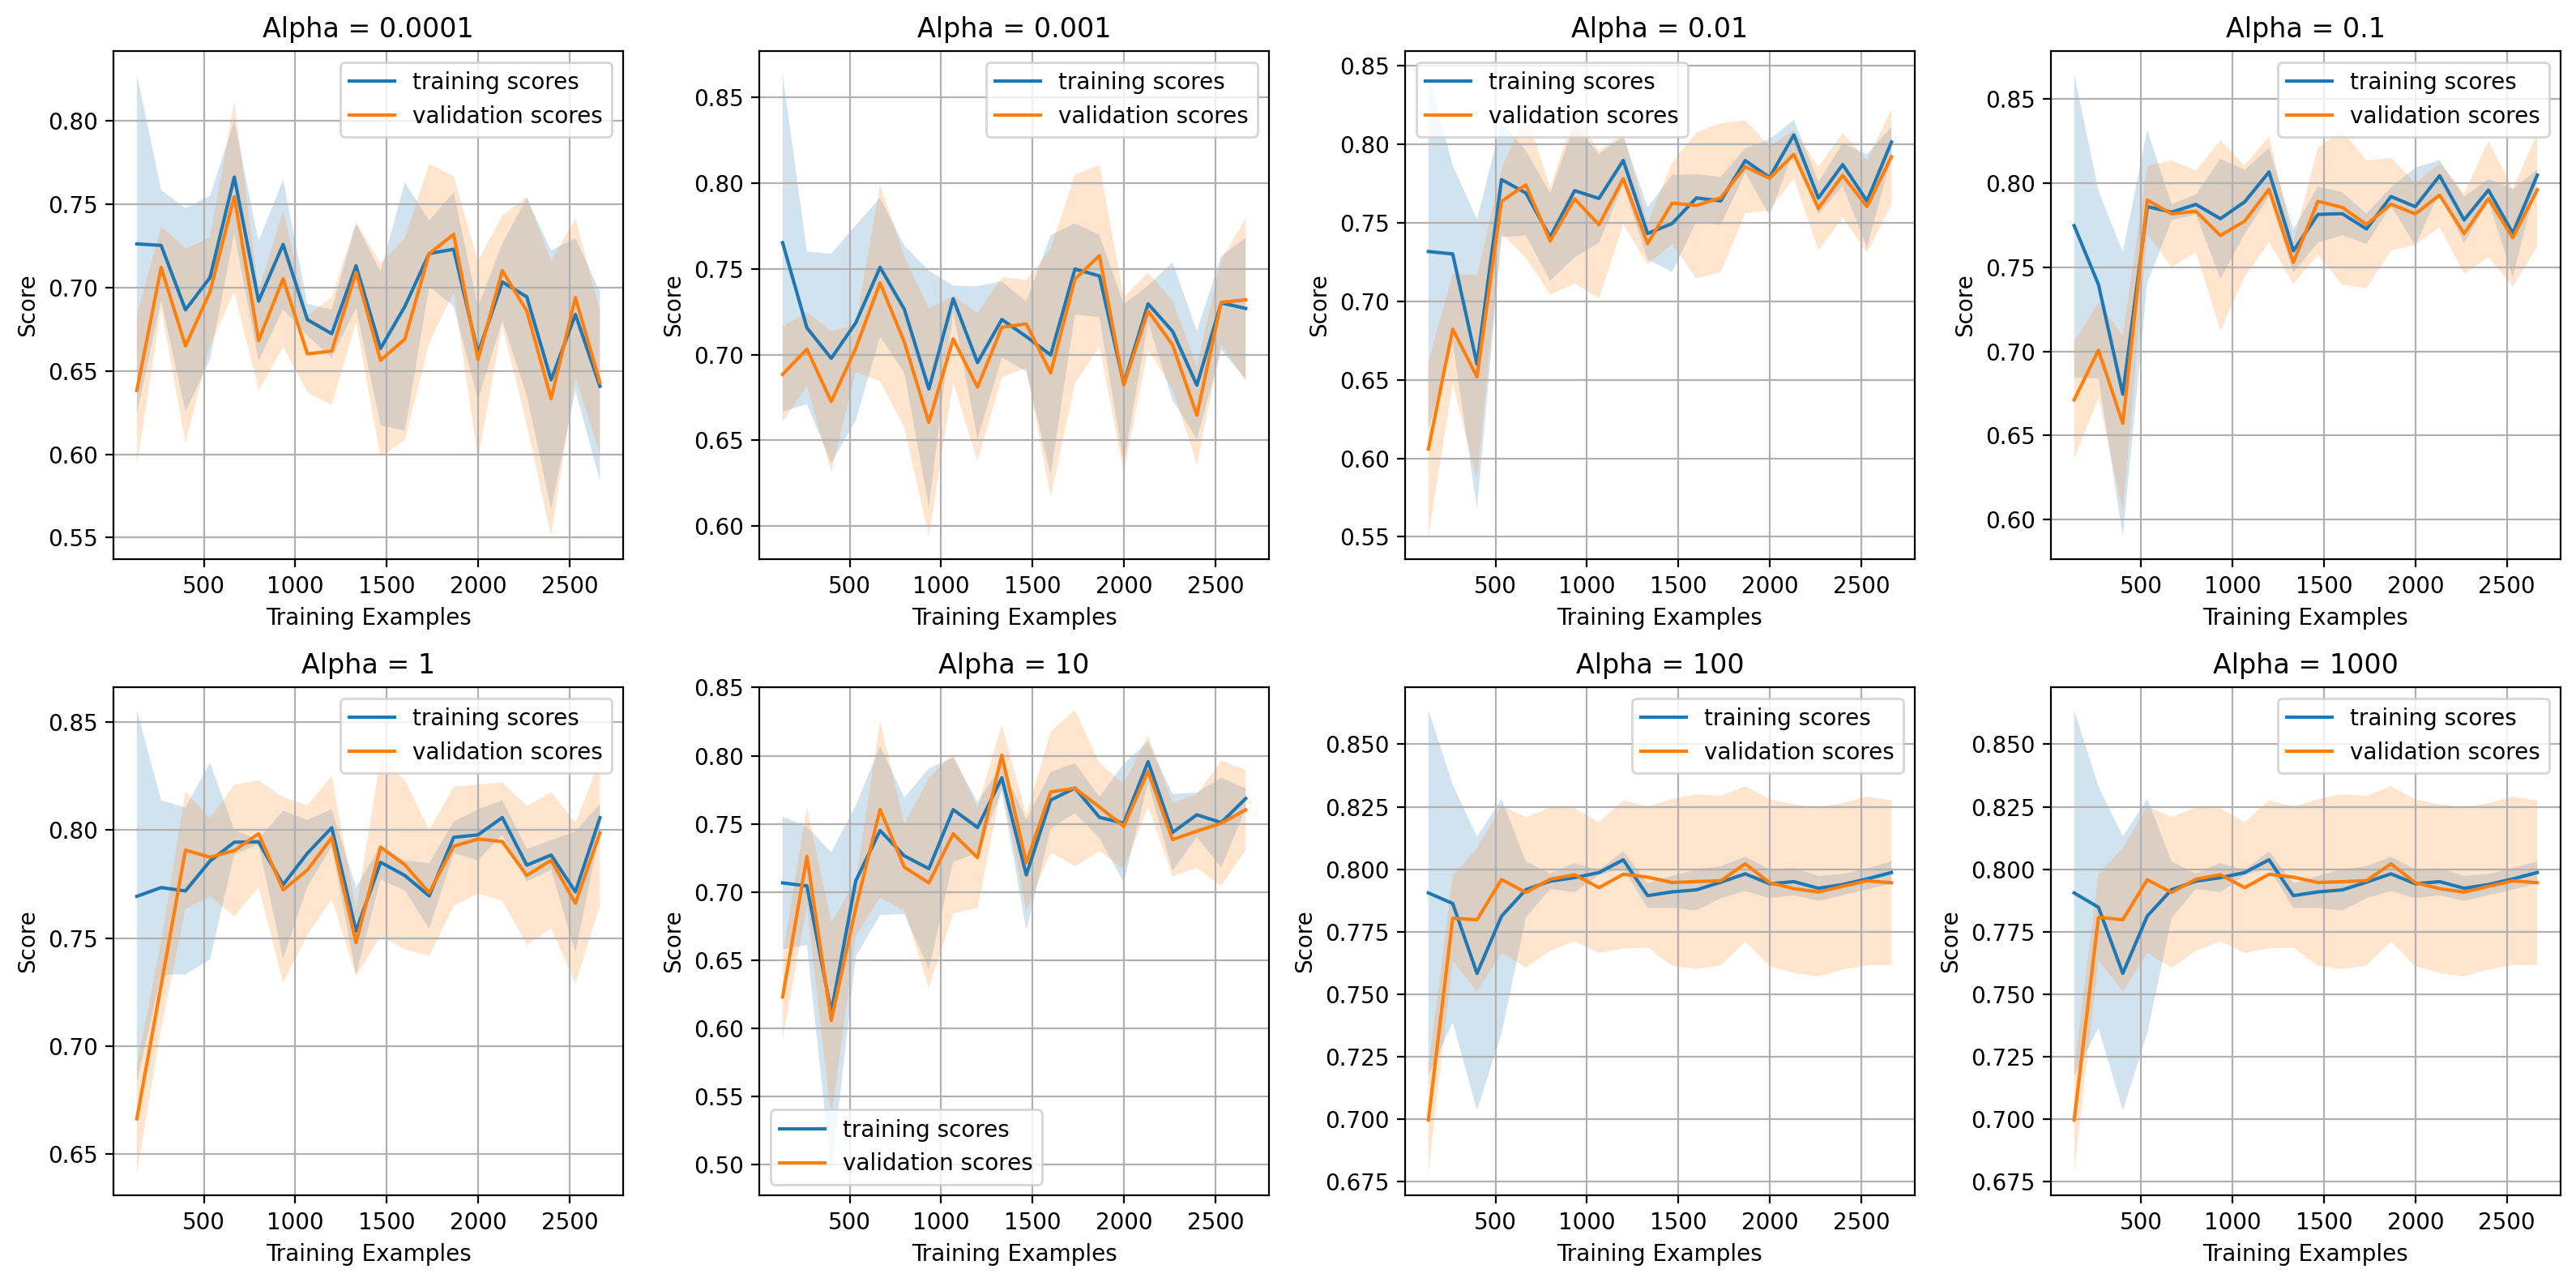

In [33]:
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
num_alphas = len(alphas)

# Create subplots
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

for i, alpha in enumerate(alphas):
    plt.sca(axes[i])  # Set the current subplot

    # Call the plot_learning_curve function with fixed degree and varying alpha
    plot_learning_curve(degree=1, alpha=alpha)

    plt.title(f"Alpha = {alpha}")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")

plt.tight_layout()
plt.show()

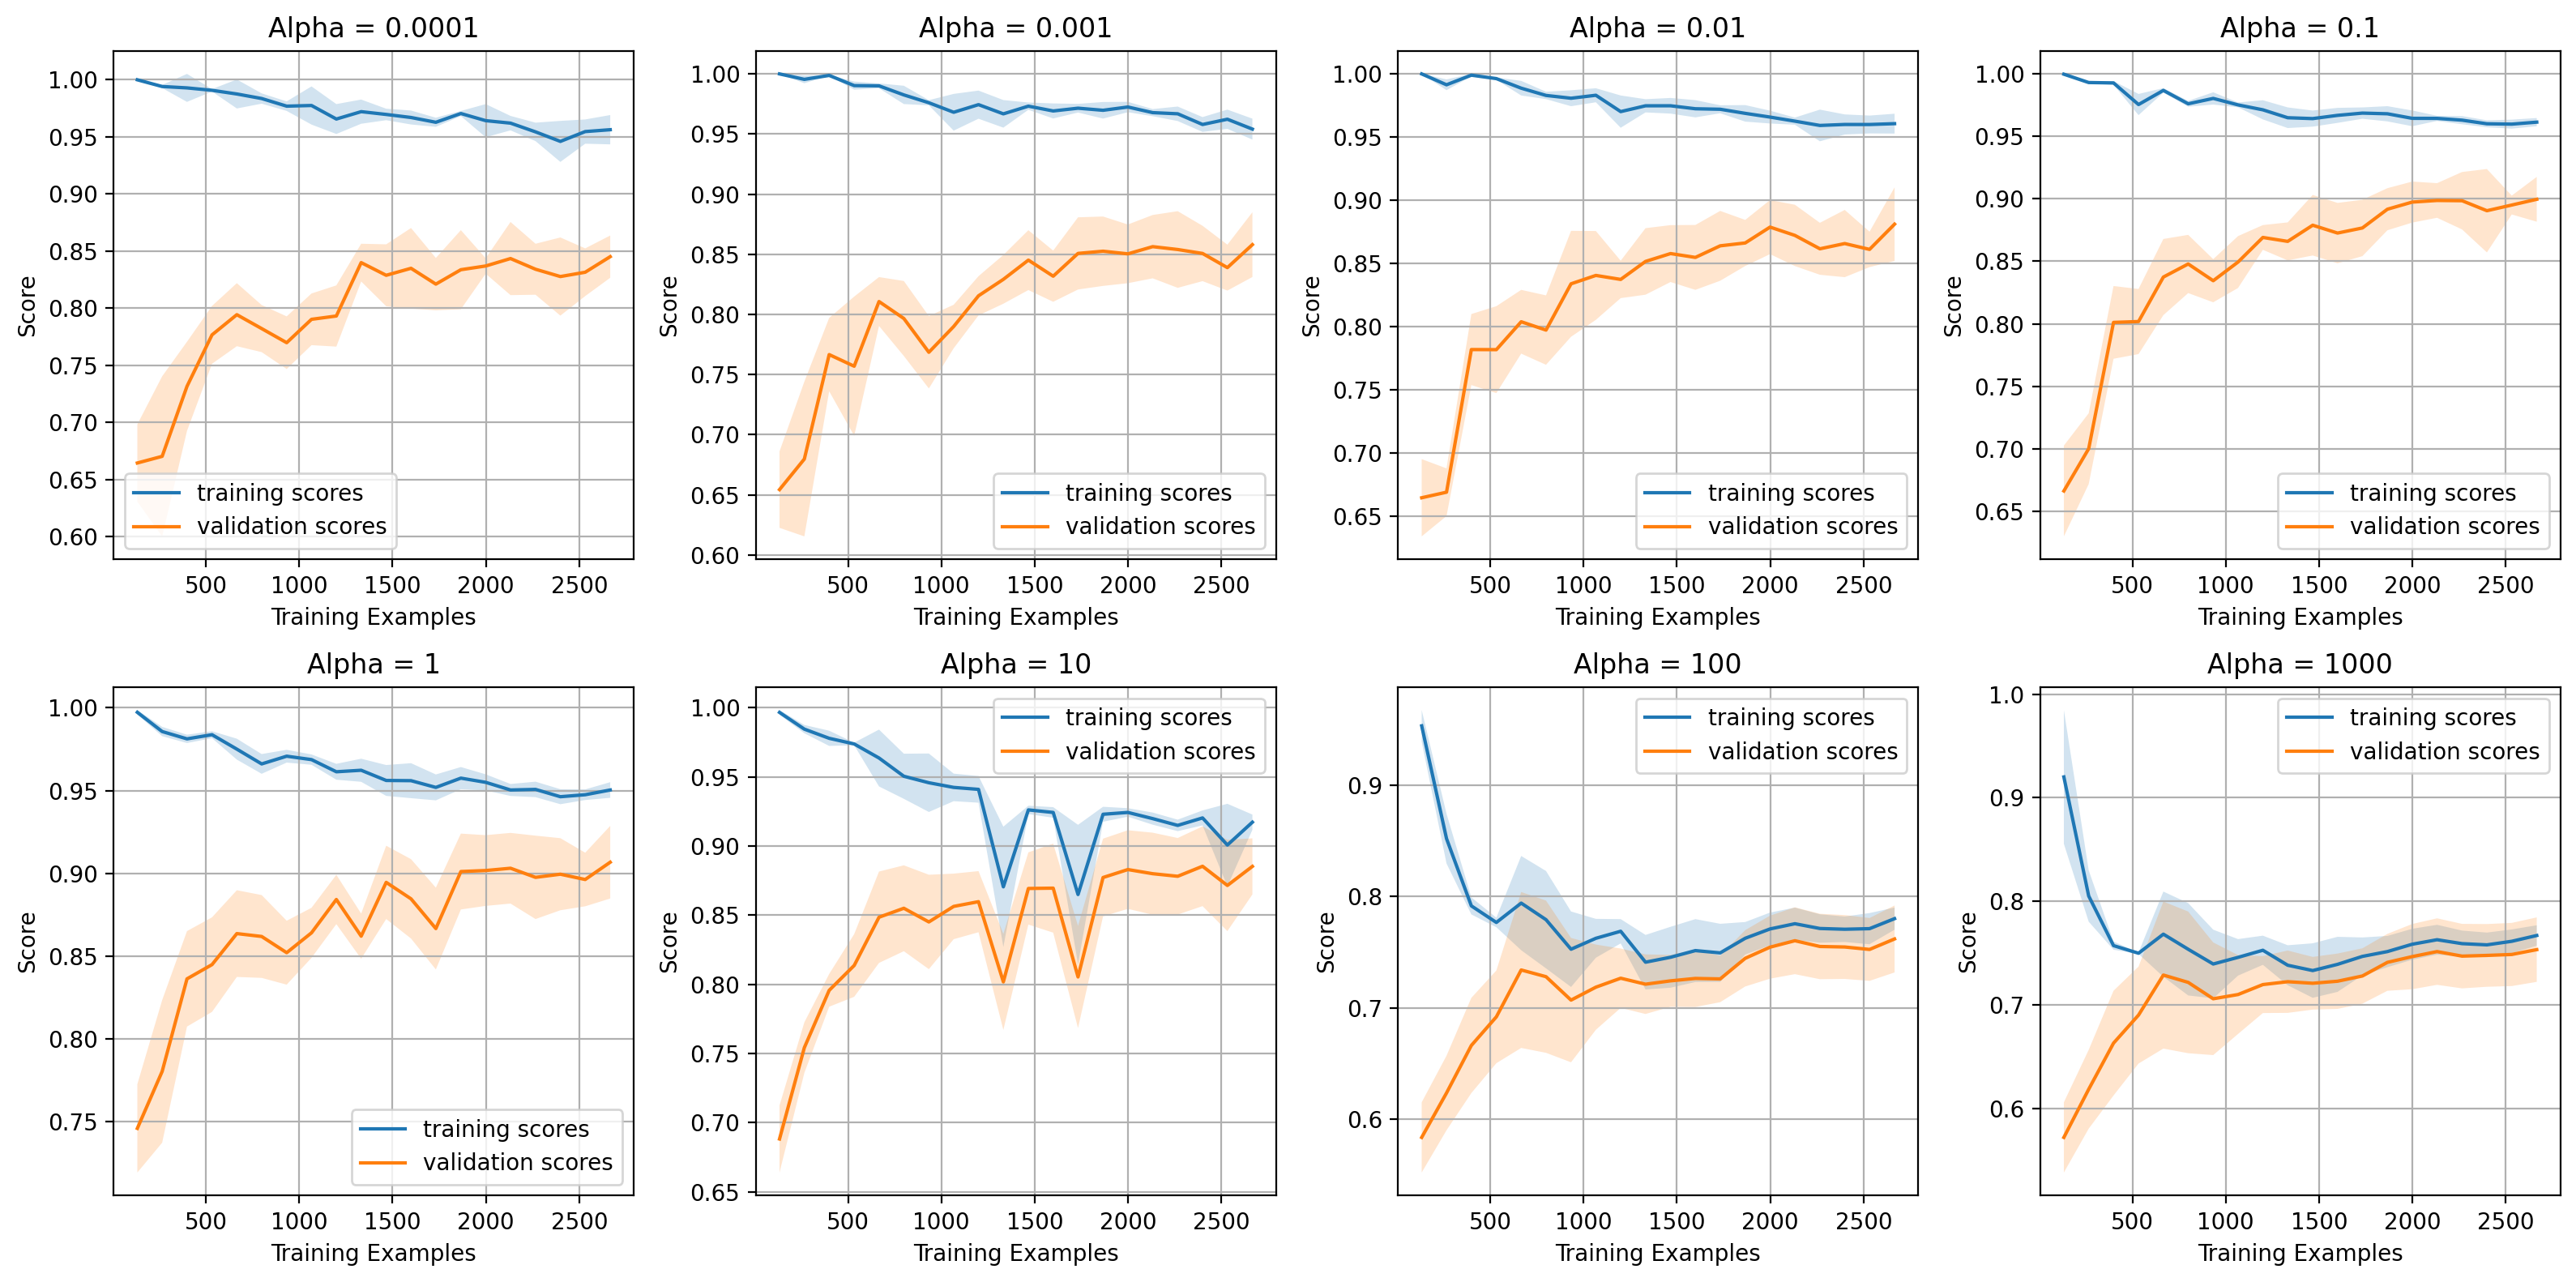

In [34]:
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
num_alphas = len(alphas)

# Create subplots
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

for i, alpha in enumerate(alphas):
    plt.sca(axes[i])  # Set the current subplot

    # Call the plot_learning_curve function with fixed degree and varying alpha
    plot_learning_curve(degree=3, alpha=alpha)

    plt.title(f"Alpha = {alpha}")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")

plt.tight_layout()
plt.show()